<h1>Trabalho de Conclusão de Curso - IDESP</h1>
<h2>Entrega - 2</h2>
<p><b>Instituição:</b> FIA - Fundação Instituto de Administração</p>
<p><b>Conteúdo:</b> <b>Entrega 02</b> - Business Case e Técnicas de Estatística Clássica</p>
<p><b>Turma</b>: 12 </p>
<p><b>Ano</b>: 2020</p>
<p><b>Autor:</b> João Paulo Ribeiro dos Santos</p>
<p><b>Localização Projeto: </b> <a href = 'https://github.com/Joao-TheCosmosIsInfinite/FIA_Projeto_Machine_Learning' target = "_blank">Git Hub</a></p>

<h2>Indice</h2> 

[1. Importações das bibliotecas](#head3_1)<br>
[2. Importações dos Datasets](#head3_2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Informações do IDESP](#head4_21)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Informações das Escolas](#head4_22)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Dependencias das Escolas](#head4_23)<br>
[3. Dicionario das colunas dos dataframes](#head3_3)<br>
[4. Informação dos dataframes](#head3_4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Dimensão dos dataframes](#head4_41)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Classificação das variáveis](#head4_42)<br>
[5. Verificar valores nulos](#head3_5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.1. Identificar e tratar valores nulos 'df_school_geolocation'](#head4_51)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.2. Identificar e tratar valores nulos 'df_idesp_2019'](#head4_52)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.3. Identificar e tratar valores nulos 'df_school_dependecy'](#head4_53)<br>
[6. Verificando e tratando outliers](#head3_6)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.1. Identificar e tratar outliers 'df_school_geolocation'](#head4_61)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.2. Identificar e tratar outliers 'df_idesp_2019'](#head4_62)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.3. Identificar e tratar outliers 'df_school_dependecy'](#head4_63)<br>
[7. Distribuição de frequencia dos dados qualitativos](#head3_7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.1. Distribuição no 'df_school_geolocation'](#head4_71)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.2. Distribuição no 'df_idesp_2019'](#head4_72)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.3. Distribuição no 'df_school_dependecy'](#head4_73)<br>
[8. Criando a ABT (Analytical Base Table)](#head3_8)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[8.1. Realizando o join entre 'df_idesp_2019' e 'df_school_geolocation'](#head4_81)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[8.2. Realizando o join entre 'df_jn_idesp_geolocation' e 'df_school_dependecy_treat'](#head4_82)<br>
[9. Realizando o tratamento com as variaveis categoricas](#head3_9)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[9.1. Analisando os dados dos parametros selecionados](#head4_91)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[9.2. Aplicando o One-Hot-Encondig](#head4_92)<br>
[10. Seleção de Hiperparâmetros](#head3_10)<br>
[11. Criando as bases de treino e teste](#head3_11)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[11.1. Definindo as variaveis](#head4_111)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[11.2. Separando as bases de treino e teste](#head4_112)<br>
[12. Submetendo o problema aos modelos](#head3_12)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[12.1. Modelo de Regressão Linear](#head4_121)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.1.1. Analisando as métricas](#head5_1211)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.1.2. Definindo os hiperparâmetros](#head5_1212)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[12.2. Modelo Árvore de Decisão com Regressão](#head4_122)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.2.1. Analisando as métricas](#head5_1221)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.2.2. Exibindo a Árvore](#head5_1222)<br>
[13. Comparando as estatísticas dos modelos](#head3_13)<br>



<a id ='head3_1'></a>
<h3>1. Importações das bibliotecas</h3>

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import graphviz
import pydotplus

from collections import defaultdict
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
from sklearn.externals.six import StringIO  
from scipy import stats
from IPython.display import Image  


%matplotlib inline

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_rows', 200)

## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_columns', 50)

<a id ='head3_2'></a>
<h3>2. Importações dos Datasets</h3>

<a id ='head4_21'></a>
<h4>2.1. Informações do IDESP</h4>

In [4]:
## IDESP  no ano de 2019
df_idesp_2019 = \
                pd.read_csv('data/IDESP/' \
                                'IDESP_ESCOLA_2019.csv')

<a id ='head4_22'></a>
<h4>2.2. Informações das Escolas</h4>

In [5]:
## Dados Geográficos das Escolas
df_school_geolocation = \
                        pd.read_csv('data/DADOS_ESCOLA/11_Escolas_Coordenadas.csv',
                                    sep = ';',
                                    decimal = ',',
                                    encoding  = 'ISO-8859-1')

<a id ='head4_23'></a>
<h4>2.3. Dependencias das Escolas</h4>

In [6]:
## Dados da infraestrutura das escolas
df_school_dependecy = \
                        pd.read_csv('data/INSTALACAO_FISICA_ESCOLA/06_Escolas_Dependencias.csv',
                                    sep = ';')                                    

<a id = 'head3_3'></a>
<h3>3. Dicionario das colunas dos dataframes</h3>

In [7]:
## Dataframes com a informação referente aos dicionarios dos dados

df_dict_school_geo = pd. \
                        read_csv('dict/DIC_11_Escolas_Coordenadas_Dic.csv',
                                 sep = ';',
                                 usecols = [0, 1])

df_dict_school_dependency = pd. \
                        read_csv('dict/DIC_06_Escolas_Dependencias.csv',
                                 sep = ';',
                                 usecols = [0, 1])

df_dict_school_idesp = pd. \
                        read_excel('dict/DIC_IDESP_2019.xlsx',
                                 usecols = [0, 1])

In [8]:
## Dicionario df_school_geolocation
df_dict_school_geo.head(16)

Nome do Campo          Descrição do Campo 
0        NOMEDEP       Nome da Rede de Ensino
1             DE  nome da Diretoria de Ensino
2            MUN            Nome do Muncípio 
3          DISTR            Nome do Distrito 
4        COD_ESC             Código da Escola
5         NOMESC              Nome da Escola 
6       SITUACAO           Situação da Escola
7        TIPOESC              Tipo da Escola 
8         ENDESC                    Endereço 
9         NUMESC          Número do Endereço 
10      COMPLEND     Complemento do Endereço 
11           CEP         CEP  da Caixa Postal
12        BAIESC                      Bairro 
13          ZONA          Zona Urbana/ Rural 
14  DS_LONGITUDE                   Longitude 
15   DS_LATITUDE                    Latitude

In [9]:
## Dicionario df_idesp_2019
df_dict_school_idesp.head(11)

Nome do Campo                                 Descrição do Campo
0         CodigoCIE                     Código Identificador da Escola
1        CodigoINEP  Código do Instituro Nacional de Estudos e Pesq...
2   CodigoDiretoria                      Código da Diretoria de Ensino
3     NomeDiretoria                        Nome da Diretoria de Ensino
4        NomeEscola                                     Nome da Escola
5     NomeMunicipio                                  Nome do Município
6       NivelEnsino  Determina o nível de ensino: AI - Anos Iniciai...
7               Ano  Indicador definindo o resultado da escola, de ...
8     Anos Iniciais                       Indicador do Nível de Ensino
9       Anos Finais                       Indicador do Nível de Ensino
10     Ensino Médio                       Indicador do Nível de Ensino

In [10]:
## Dicionario df_school_dependecy
df_dict_school_dependency.head(171)

Nome do Campo  \
0                         NOMEDEP   
1                              DE   
2                             MUN   
3                           DISTR   
4                          CODESC   
5                          NOMESC   
6                         TIPOESC   
7                    TIPOESC_DESC   
8                        SITUACAO   
9                      SALAS_AULA   
10                   SALAS_ED_INF   
11                   SALAS_ED_ESP   
12                   SALAS_ED_ART   
13                   SALA_RECURSO   
14                 TOT_SALAS_AULA   
15                      AUDITORIO   
16                     ANFITEATRO   
17                         TEATRO   
18                        CANTINA   
19                           COPA   
20                        COZINHA   
21                     REFEITORIO   
22             DEPOSITO_ALIMENTOS   
23                       DESPENSA   
24                   TOT_DESPENSA   
25                   SALA_LEITURA   
26                     BIBLIOTECA   
27               TOT_SALA_LEITURA   
28                 QUADRA_COBERTA   
29              QUADRA_DESCOBERTA   
30                        GINASIO   
31                     TOT_QUADRA   
32                   QUADRA_AREIA   
33                   QUADRA_GRAMA   
34                  CAMPO_FUTEBOL   
35              GABINETE_DENTARIO   
36             CONSULTORIO_MEDICO   
37                     ENFERMARIA   
38                    AMBULATORIO   
39                   ALMOXARIFADO   
40                        ARQUIVO   
41                    REPROGRAFIA   
42                    SALA_GREMIO   
43                      DIRETORIA   
44                  VICEDIRETORIA   
45                      SALA_PROF   
46                     SECRETARIA   
47                 SALA_ORIENT_ED   
48               SALA_COORD_PEDAG   
49                  PATIO_COBERTO   
50               PATIO_DESCOBERTO   
51                      ZELADORIA   
52                  VESTIARIO_FEM   
53                 VESTIARIO_MASC   
54                  TOT_VESTIARIO   
55                      VIDEOTECA   
56                        SALA_TV   
57                       LAB_INFO   
58                   LAB_CIENCIAS   
59                     LAB_FISICA   
60                    LAB_QUIMICA   
61                   LAB_BIOLOGIA   
62   LAB_CIENCIA_FISICA_BIOLOGICA   
63                TOT_LAB_CIENCIA   
64                    LAB_LINGUAS   
65                   LAB_MULTIUSO   
66                        OFICINA   
67                     PLAYGROUND   
68                     DORMITORIO   
69                       BERCARIO   
70             SANITARIO_ADEQ_PRE   
71         SANITARIO_ADEQ_PRE_FEM   
72        SANITARIO_ADEQ_PRE_MASC   
73             SANITARIO_ADEQ_DEF   
74        SANITARIO_ADEQ_DEF_MASC   
75              SANITARIO_AL_MASC   
76               SANITARIO_AL_FEM   
77               TOT_SANITARIO_AL   
78             SANITARIO_FUNC_FEM   
79            SANITARIO_FUNC_MASC   
80             TOT_SANITARIO_FUNC   
81                DEPEND_ADEQ_DEF   
82                 SALA_ED_FISICA   
83                        PISCINA   
84                       PORTARIA   
85          SALA_PROG_ESC_FAMILIA   
86                  BRINQUEDOTECA   
87                      FRALDARIO   
88                       LACTARIO   
89                     LAVANDERIA   
90                        SOLARIO   
91                    SALA_ESPERA   
92                  SALA_INSPETOR   
93                   SALA_REUNIAO   
94                     TESOURARIA   
95                   SALA_REFORCO   
96           SALA_DIRETOR_TECNICO   
97                 GARAGEM_ONIBUS   
98              SALA_FISIOTERAPIA   
99                SALA_PSICOLOGIA   
100           SALA_FONOAUDIOLOGIA   
101                  SALA_EVENTOS   
102            SALA_ASSIST_SOCIAL   
103             SALA_TERAPIA_EDUC   
104                    ABATEDOURO   
105                ALOJAMENTO_FEM   
106               ALOJAMENTO_MASC   
107                TOT_A

<a id = 'head3_4'></a>
<h3>4. Informação dos dataframes</h3>

<a id = 'head4_41'></a>
<h4>4.1. Dimensão dos dataframes</h4>

In [11]:
## Dimensão do dataframe
print('Dimensão do dataframe "df_school_dependecy":', \
                                                df_school_dependecy.shape)

print('Dimensão do dataframe "df_school_geolocation":', \
                                                df_school_geolocation.shape)

print('Dimensão do dataframe "df_idesp_2019":', \
                                                df_idesp_2019.shape)


Dimensão do dataframe "df_school_dependecy": (5608, 172)
Dimensão do dataframe "df_school_geolocation": (5736, 17)
Dimensão do dataframe "df_idesp_2019": (5047, 10)


In [12]:
## Schema do dataframe
df_school_geolocation.dtypes

NOMEDEP          object
DE               object
MUN              object
DISTR            object
COD_ESC           int64
NOMESC           object
SITUACAO         object
TIPOESC          object
ENDESC           object
NUMESC           object
COMPLEND         object
CEP               int64
BAIESC           object
ZONA             object
DS_LONGITUDE    float64
DS_LATITUDE     float64
CODVINC         float64
dtype: object

In [13]:
## Schema do dataframe
df_idesp_2019.dtypes

ANO_LETIVO           int64
CODIGO_CIE           int64
CODIGO_INEP          int64
CodigoDiretoria      int64
NomeDiretoria       object
NomeEscola          object
NomeMunicipio       object
ANOS_INICIAIS      float64
ANOS_FINAIS        float64
ENSINO_MÉDIO       float64
dtype: object

In [14]:
## Schema do dataframe
df_school_dependecy.dtypes

NOMEDEP                         object
DE                              object
MUN                             object
DISTR                           object
CODESC                           int64
NOMESC                          object
TIPOESC                          int64
TIPOESC_DESC                    object
SITUACAO                        object
SALAS_AULA                       int64
SALAS_ED_INF                     int64
SALAS_ED_ESP                     int64
SALAS_ED_ART                     int64
SALA_RECURSO                     int64
TOT_SALAS_AULA                   int64
AUDITORIO                        int64
ANFITEATRO                       int64
TEATRO                           int64
CANTINA                          int64
COPA                             int64
COZINHA                          int64
REFEITORIO                       int64
DEPOSITO_ALIMENTOS               int64
DESPENSA                         int64
TOT_DESPENSA                     int64
SALA_LEITURA             

<a id = 'head4_42'></a>
<h4>4.2. Classificação das variáveis</h4>

In [15]:
df_dict_school_idesp['Classificacao Variavel'] = \
                np.where(np.isin(df_dict_school_idesp['Nome do Campo'],
                                 ['NomeDiretoria', 'NomeEscola', 'NomeMunicipio',
                                                                   'NivelEnsino']),
                        'Qualitativa Nominal',
                         np.where(np.isin(df_dict_school_idesp['Nome do Campo'],
                                          ['CodigoCIE', 'CodigoINEP', 'CodigoDiretoria', 'Ano']),
                                 'Quantitativa Discreta', 
                                 'Quantitativa Continua'))

df_dict_school_geo['Classificacao Variavel'] = \
                np.where(np.isin(df_dict_school_geo['Nome do Campo'],
                                 ['NOMEDEP', 'DE', 'MUN', 'DISTR', 'NOMESC', 'SITUACAO', 'TIPOESC', 'ENDESC',
                                  'COMPLEND', 'CEP', 'BAIESC', 'ZONA']),
                        'Qualitativa Nominal',
                         np.where(np.isin(df_dict_school_geo['Nome do Campo'],
                                          ['COD_ESC', 'NUMESC', 'CODVINC']),
                                 'Quantitativa Discreta', 
                                 'Quantitativa Continua'))

df_dict_school_dependency['Classificacao Variavel'] = \
                np.where(np.isin(df_dict_school_dependency['Nome do Campo'],
                                 ['NOMEDEP', 'DE', 'MUN', 'DISTR', 'NOMESC', 'TIPOESC_DESC', 'SITUACAO']),
                        'Qualitativa Nominal',
                        'Quantitativa Discreta')

In [16]:
## Verificar os dados iniciais
df_dict_school_idesp \
                .loc[:, ['Nome do Campo', 'Classificacao Variavel']] \
                .head(11)

Nome do Campo Classificacao Variavel
0         CodigoCIE  Quantitativa Discreta
1        CodigoINEP  Quantitativa Discreta
2   CodigoDiretoria  Quantitativa Discreta
3     NomeDiretoria    Qualitativa Nominal
4        NomeEscola    Qualitativa Nominal
5     NomeMunicipio    Qualitativa Nominal
6       NivelEnsino    Qualitativa Nominal
7               Ano  Quantitativa Discreta
8     Anos Iniciais  Quantitativa Continua
9       Anos Finais  Quantitativa Continua
10     Ensino Médio  Quantitativa Continua

In [17]:
## Verificar os dados iniciais
df_dict_school_geo \
            .loc[:, ['Nome do Campo', 'Classificacao Variavel']] \
            .head(17)

Nome do Campo Classificacao Variavel
0        NOMEDEP    Qualitativa Nominal
1             DE    Qualitativa Nominal
2            MUN    Qualitativa Nominal
3          DISTR    Qualitativa Nominal
4        COD_ESC  Quantitativa Discreta
5         NOMESC    Qualitativa Nominal
6       SITUACAO    Qualitativa Nominal
7        TIPOESC    Qualitativa Nominal
8         ENDESC    Qualitativa Nominal
9         NUMESC  Quantitativa Discreta
10      COMPLEND    Qualitativa Nominal
11           CEP    Qualitativa Nominal
12        BAIESC    Qualitativa Nominal
13          ZONA    Qualitativa Nominal
14  DS_LONGITUDE  Quantitativa Continua
15   DS_LATITUDE  Quantitativa Continua
16       CODVINC  Quantitativa Discreta

In [18]:
## Verificar os dados iniciais
df_dict_school_dependency \
            .loc[:, ['Nome do Campo', 'Classificacao Variavel']] \
            .head(172)

Nome do Campo Classificacao Variavel
0                         NOMEDEP    Qualitativa Nominal
1                              DE    Qualitativa Nominal
2                             MUN    Qualitativa Nominal
3                           DISTR    Qualitativa Nominal
4                          CODESC  Quantitativa Discreta
5                          NOMESC    Qualitativa Nominal
6                         TIPOESC  Quantitativa Discreta
7                    TIPOESC_DESC    Qualitativa Nominal
8                        SITUACAO    Qualitativa Nominal
9                      SALAS_AULA  Quantitativa Discreta
10                   SALAS_ED_INF  Quantitativa Discreta
11                   SALAS_ED_ESP  Quantitativa Discreta
12                   SALAS_ED_ART  Quantitativa Discreta
13                   SALA_RECURSO  Quantitativa Discreta
14                 TOT_SALAS_AULA  Quantitativa Discreta
15                      AUDITORIO  Quantitativa Discreta
16                     ANFITEATRO  Quantitativa Discreta
17                         TEATRO  Quantitativa Discreta
18                        CANTINA  Quantitativa Discreta
19                           COPA  Quantitativa Discreta
20                        COZINHA  Quantitativa Discreta
21                     REFEITORIO  Quantitativa Discreta
22             DEPOSITO_ALIMENTOS  Quantitativa Discreta
23                       DESPENSA  Quantitativa Discreta
24                   TOT_DESPENSA  Quantitativa Discreta
25                   SALA_LEITURA  Quantitativa Discreta
26                     BIBLIOTECA  Quantitativa Discreta
27               TOT_SALA_LEITURA  Quantitativa Discreta
28                 QUADRA_COBERTA  Quantitativa Discreta
29              QUADRA_DESCOBERTA  Quantitativa Discreta
30                        GINASIO  Quantitativa Discreta
31                     TOT_QUADRA  Quantitativa Discreta
32                   QUADRA_AREIA  Quantitativa Discreta
33                   QUADRA_GRAMA  Quantitativa Discreta
34                  CAMPO_FUTEBOL  Quantitativa Discreta
35              GABINETE_DENTARIO  Quantitativa Discreta
36             CONSULTORIO_MEDICO  Quantitativa Discreta
37                     ENFERMARIA  Quantitativa Discreta
38                    AMBULATORIO  Quantitativa Discreta
39                   ALMOXARIFADO  Quantitativa Discreta
40                        ARQUIVO  Quantitativa Discreta
41                    REPROGRAFIA  Quantitativa Discreta
42                    SALA_GREMIO  Quantitativa Discreta
43                      DIRETORIA  Quantitativa Discreta
44                  VICEDIRETORIA  Quantitativa Discreta
45                      SALA_PROF  Quantitativa Discreta
46                     SECRETARIA  Quantitativa Discreta
47                 SALA_ORIENT_ED  Quantitativa Discreta
48               SALA_COORD_PEDAG  Quantitativa Discreta
49                  PATIO_COBERTO  Quantitativa Discreta
50               PATIO_DESCOBERTO  Quantitativa Discreta
51                      ZELADORIA  Quantitativa Discreta
52                  VESTIARIO_FEM  Quantitativa Discreta
53                 VESTIARIO_MASC  Quantitativa Discreta
54                  TOT_VESTIARIO  Quantitativa Discreta
55                      VIDEOTECA  Quantitativa Discreta
56                        SALA_TV  Quantitativa Discreta
57                       LAB_INFO  Quantitativa Discreta
58                   LAB_CIENCIAS  Quantitativa Discreta
59                     LAB_FISICA  Quantitativa Discreta
60                    LAB_QUIMICA  Quantitativa Discreta
61                   LAB_BIOLOGIA  Quantitativa Discreta
62   LAB_CIENCIA_FISICA_BIOLOGICA  Quantitativa Discreta
63                TOT_LAB_CIENCIA  Quantitativa Discreta
64                    LAB_LINGUAS  Quantitativa Discreta
65                   LAB_MULTIUSO  Quantitativa Discreta
66                        OFICINA  Quantitativa Discreta
67                     PLAYGROUND  Quantitativa Discreta
68                     DORMITORIO  Quantitativa Discreta
69                       BERCA

<a id = 'head3_5'></a>
<h3>5. Verificar valores nulos</h3>

<a id = 'head4_51'></a>
<h4>5.1. Identificar e tratar valores nulos 'df_school_geolocation'</h4>

In [19]:
## Quantidade de valores nulos por coluna
df_school_geolocation.isnull().sum()

NOMEDEP            0
DE                 0
MUN                0
DISTR              0
COD_ESC            0
NOMESC             0
SITUACAO           0
TIPOESC            0
ENDESC             5
NUMESC             1
COMPLEND         382
CEP                0
BAIESC             8
ZONA               1
DS_LONGITUDE       5
DS_LATITUDE        5
CODVINC         5137
dtype: int64

In [20]:
## Porcentagem de valores nulos por coluna
df_school_geolocation.isnull().sum() / len(df_school_geolocation) * 100

NOMEDEP          0.000000
DE               0.000000
MUN              0.000000
DISTR            0.000000
COD_ESC          0.000000
NOMESC           0.000000
SITUACAO         0.000000
TIPOESC          0.000000
ENDESC           0.087169
NUMESC           0.017434
COMPLEND         6.659693
CEP              0.000000
BAIESC           0.139470
ZONA             0.017434
DS_LONGITUDE     0.087169
DS_LATITUDE      0.087169
CODVINC         89.557183
dtype: float64

<p>As colunas <b>'ENDESC', 'COMPLEND', 'BAIESC', 'ZONA'</b> correspondem dados que algumas escolas ou mesmo residencias não possuem, ou não foi informado no cadastro, para todas essas colunas que possuem valores nulos, atribuíremos a frase <b>'NAO INFORMADO'</b></p>
<p>A coluna <b>'NUMESC'</b> se refere ao numero da escola, como apenas 1 escola dentre as milhares existentes não possui numero, então atribuiremos o valor ja existente <b>'S/N'</b>.</p>

In [21]:
## Lista com as colunas
lst_columns = ['ENDESC', 'COMPLEND', 'BAIESC', 'ZONA']

## Aplicar o valor NAO INFORMADO para as linhas com valores nulos
df_school_geolocation.fillna({'ENDESC': 'NAO INFORMADO',
                              'COMPLEND': 'NAO INFORMADO',
                              'BAIESC': 'NAO INFORMADO',
                              'ZONA': 'NAO INFORMADO',
                              'NUMESC': 'SN'}, inplace = True)

In [22]:
## Quantidade de valores nulos por coluna
df_school_geolocation.head(5)

NOMEDEP       DE        MUN           DISTR  COD_ESC  \
0  ESTADUAL - SE  NORTE 1  SAO PAULO         JAGUARA       12   
1  ESTADUAL - SE  NORTE 1  SAO PAULO           PERUS       24   
2  ESTADUAL - SE  NORTE 1  SAO PAULO  FREGUESIA DO O       36   
3  ESTADUAL - SE  NORTE 1  SAO PAULO     BRASILANDIA       48   
4  ESTADUAL - SE  NORTE 1  SAO PAULO      ANHANGUERA       59   

                                   NOMESC SITUACAO TIPOESC  \
0                AYRES DE MOURA PROFESSOR    Ativa      EE   
1               GAVIAO PEIXOTO BRIGADEIRO    Ativa      EE   
2                            JOAO SOLIMEO    Ativa      EE   
3       WALFREDO ARANTES CALDAS PROFESSOR    Ativa      EE   
4  SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR    Ativa      EE   

                      ENDESC NUMESC       COMPLEND      CEP            BAIESC  \
0          RUA ARTUR ORLANDO    907            RUA  5118000      VILA JAGUARA   
1                    MOGEIRO    710            RUA  5208230        VILA PERUS   
2                   DO SABAO   1497        ESTRADA  2806000  JARDIM MARISTELA   
3  DEPUTADO CANTIDIO SAMPAIO   1701  NAO INFORMADO  2860001        VILA SOUZA   
4        RUA FRANCISCO GIRON     SN        ESTRADA  5267000        MORRO DOCE   

     ZONA  DS_LONGITUDE  DS_LATITUDE  CODVINC  
0  URBANA    -46.749100   -23.512199      NaN  
1  URBANA    -46.759399   -23.404699      NaN  
2  URBANA    -46.700821   -23.481279      NaN  
3  URBANA    -46.679531   -23.464180      NaN  
4  URBANA    -46.792249   -23.437950      NaN

<p>A coluna <b>'CODVINC'/ Codigo MEC</b> corresponde a escola vinculadora, que esta associado a escolas muito pequenas, com no máximo 3 salas de aula, por esse motivo essa escola fica vinculada a uma escola maior, logo podemos dizer que aproximadamente 11% das escolas são muito pequenas. Diante disso aplicaremos o valor ZERO as escolas sem vinculadora, e criaremos uma coluna extra indicando que a escola possui vinculadora.</p>
<p>Link Referencia: http://www.dominiopublico.gov.br/download/texto/me002123.pdf</p>

In [23]:
## Criar coluna indicando se a escola possui vinculadora
df_school_geolocation['POSSUI_VINCULADORA'] = np.where(df_school_geolocation['CODVINC'].isnull(), 0, 1)

## Substituir os valores nulos por zero
df_school_geolocation['CODVINC'].fillna(0, inplace = True)

<p>As proximas colunas com valores nulos correspondem as coordenadas geográficas, possivelmente tais coordenadas não foram incluidas no cadastro. Iremos verificar quais são essas escolas</p>

In [24]:
df_school_geolocation[df_school_geolocation['DS_LONGITUDE'].isnull()]

NOMEDEP              DE        MUN           DISTR  COD_ESC  \
4079  ESTADUAL - SE  CAMPINAS LESTE   CAMPINAS  CAMPINAS LESTE   478830   
4138  ESTADUAL - SE  CAMPINAS LESTE   CAMPINAS  CAMPINAS LESTE   498671   
4226  ESTADUAL - SE  CAMPINAS LESTE   CAMPINAS  CAMPINAS LESTE   563948   
4271  ESTADUAL - SE    CENTRO OESTE  SAO PAULO      VILA SONIA   577212   
4296  ESTADUAL - SE        BARRETOS   BARRETOS        BARRETOS   584459   

                                                 NOMESC SITUACAO  \
4079  CENTRO ATEND SOCIOED AO ADOLESC CAMPINAS UN II CI    Ativa   
4138  CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...    Ativa   
4226  CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...    Ativa   
4271             HOSPITAL ALBERT EINSTEIN CL HOSPITALAR    Ativa   
4296  CLASSE HOSPITALAR FUNDACAO PIO XII HOSPITAL DO...    Ativa   

                                  TIPOESC                    ENDESC NUMESC  \
4079   FEBEM - UI (CASA À PARTIR DE 2007)  ALADINO SELMI COMENDADOR     SN   
4138  FEBEM - UIP (CASA À PARTIR DE 2007)  ALADINO SELMI COMENDADOR     SN   
4226   FEBEM - UI (CASA À PARTIR DE 2007)  ALADINO SELMI COMENDADOR      1   
4271                    CLASSE HOSPITALAR       LOURENCO DE AZEVEDO    149   
4296                    CLASSE HOSPITALAR     ANTENOR DUARTE VILELA   1331   

     COMPLEND       CEP              BAIESC    ZONA  DS_LONGITUDE  \
4079  AVENIDA  13069096     VILA SAN MARTIN  URBANA           NaN   
4138  AVENIDA  13069096     VILA SAN MARTIN  URBANA           NaN   
4226  AVENIDA  13069096     VILA SAN MARTIN  URBANA           NaN   
4271      RUA   5624060          VILA MORSE  URBANA           NaN   
4296      RUA  14784400  DOUTOR PAULO PRATA  URBANA           NaN   

      DS_LATITUDE  CODVINC  POSSUI_VINCULADORA  
4079          NaN  65626.0                   1  
4138          NaN  65626.0                   1  
4226          NaN  65626.0                   1  
4271          NaN   4259.0                   1  
4296          NaN  22214.0                   1

<p>As escolas sem coordenadas geográficas possuem escola vinculadora, logo aplicaremos as coordenadas de suas escolas vinculadoras.</p>

In [25]:
## Latitude e longitude das escolas vinculadas
df_vinculated_school = df_school_geolocation[df_school_geolocation['COD_ESC'].isin([4259, 22214, 65626])] \
                                                    .loc[:, ['COD_ESC', 'DS_LONGITUDE', 'DS_LATITUDE']]
## Realizando o Join com o dataframe novo
df_school_geolocation = df_school_geolocation.merge(df_vinculated_school, 
                                                    left_on = 'CODVINC', 
                                                    right_on = 'COD_ESC', 
                                                    suffixes=('_left', '_right'),
                                                    how = 'left')
## Atualizar os dados
df_school_geolocation['DS_LONGITUDE_left'] = np.where(df_school_geolocation['DS_LONGITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LONGITUDE_right'],
                                                      df_school_geolocation['DS_LONGITUDE_left'])

df_school_geolocation['DS_LATITUDE_left'] = np.where(df_school_geolocation['DS_LATITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LATITUDE_right'],
                                                      df_school_geolocation['DS_LATITUDE_left'])
## Renomear colunas
df_school_geolocation.rename(columns = {"COD_ESC_left" : "COD_ESC",
                                        "DS_LONGITUDE_left" : "DS_LONGITUDE",
                                        "DS_LATITUDE_left" : "DS_LATITUDE"},
                             inplace = True)

## Dropar/ Deletar colunas desnecessarias
df_school_geolocation.drop(columns = ['COD_ESC_right', 'DS_LONGITUDE_right', 'DS_LATITUDE_right'],
                           inplace = True)

## Deletar datarframe que não sera mais utilizado
del df_vinculated_school

In [26]:
## Verificar se ainda existem valores nulos
df_school_geolocation.isnull().sum()

NOMEDEP               0
DE                    0
MUN                   0
DISTR                 0
COD_ESC               0
NOMESC                0
SITUACAO              0
TIPOESC               0
ENDESC                0
NUMESC                0
COMPLEND              0
CEP                   0
BAIESC                0
ZONA                  0
DS_LONGITUDE          0
DS_LATITUDE           0
CODVINC               0
POSSUI_VINCULADORA    0
dtype: int64

<a id = 'head4_52'></a>
<h4>5.2. Identificar e tratar valores nulos 'df_idesp_2019'</h4>

In [27]:
## Quantidade de valores nulos
df_idesp_2019.isnull().sum()

ANO_LETIVO         0
CODIGO_CIE         0
CODIGO_INEP        0
CodigoDiretoria    0
NomeDiretoria      0
NomeEscola         0
NomeMunicipio      0
ANOS_INICIAIS      0
ANOS_FINAIS        0
ENSINO_MÉDIO       0
dtype: int64

In [28]:
## Verificar a porncentagem de valores nulos
df_idesp_2019.isnull().sum() / len(df_idesp_2019) * 100

ANO_LETIVO         0.0
CODIGO_CIE         0.0
CODIGO_INEP        0.0
CodigoDiretoria    0.0
NomeDiretoria      0.0
NomeEscola         0.0
NomeMunicipio      0.0
ANOS_INICIAIS      0.0
ANOS_FINAIS        0.0
ENSINO_MÉDIO       0.0
dtype: float64

<a id = 'head4_53'></a>
<h4>5.3. Identificar e tratar valores nulos 'df_school_dependecy'</h4>
<p>Como o dataframe possui mais de 150 colunas, iremos verificar se existe alguma coluna com valor nulo.</p>

In [29]:
## Verificar se há alguma coluna com valor nulo
df_school_dependecy.isnull().any().any()

False

<a id = 'head3_6'></a>
<h3>6. Verificando e tratando outliers</h3>

<a id = 'head4_61'></a>
<h4>6.1. Identificar e tratar outliers 'df_school_geolocation'</h4>

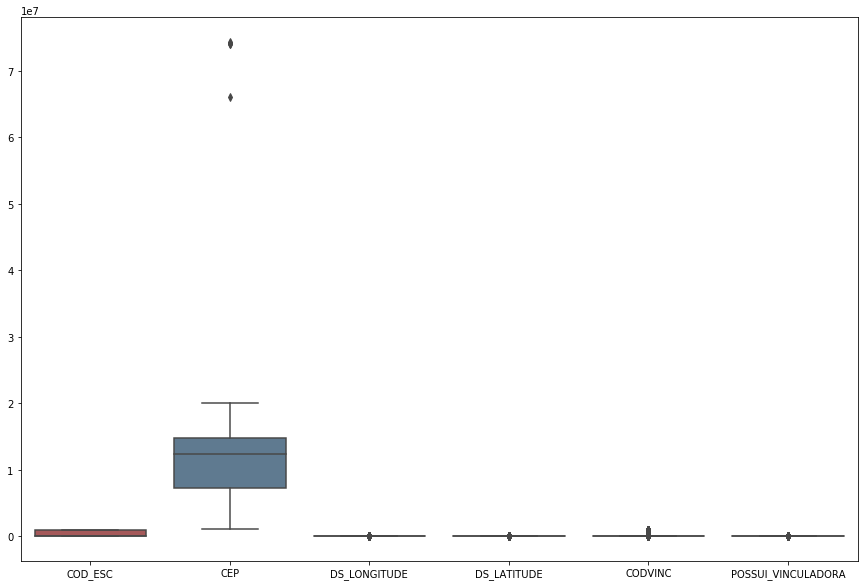

In [30]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_geolocation,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>
    Com exceção do codigo da escola, todos os demais campos apresentaram outliers, mas dado as caracteristicas desses campos, podemos ignorar essa informação. A seguir esta pontuada uma explicação sobre esses outliers:
    <ol>
        <li><b>CEP</b>: A informação do CEP atua de forma categórica, afinal todo endereço possui um CEP associado;</li>
        <li><b>DS_LONGITUDE e DS_LATITUDE</b>: São coordenadas geográficas, portanto não há muito o que fazer com tal informação, ja que isso possui caracteristicas cadastrais, o que podemos fazer posteriormente é validar essas coordenadas usando a biblioteca Folium;</li>
        <li><b>CODVINC</b>: Refere-se basicamente ao codigo de outra escola no qual esta associada, não apresenta muita informação com isso;</li>
        <li><b>POSSUI_VINCULADORA</b>: Classe binária que apenas indica se a escola possui uma vinculadora ou não;</li>
    </ol>
</p>

<a id = 'head4_62'></a>
<h4>6.2. Identificar e tratar outliers 'df_idesp_2019'</h4>

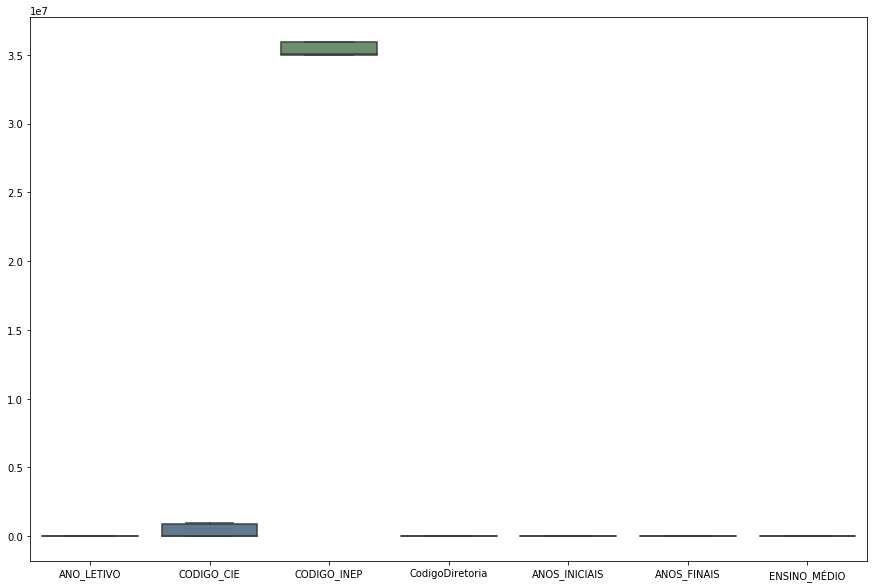

In [31]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_idesp_2019,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>Não foram identificados outliers, mesmo nas variaveis que carregam as informações que serão preditas.🙏</p>

<a id = 'head4_63'></a>
<h4>6.3. Identificar e tratar outliers 'df_school_dependecy'</h4>
<p>Como existem muitas colunas, é interessante verificar os valores possiveis de cada coluna e assim determinar quais deverão ser analisadas, afinal, muitas possuem caracteristicas categoricas.</p>

In [32]:
## Lista de colunas numericas
lst_columns = df_school_dependecy.select_dtypes(include = np.number).columns.to_list()
lst_columns = [x for x in lst_columns if x not in('CODESC', 'TIPOESC')]

## Exibir quantidade de valores unicos por coluna
df_school_dependecy[lst_columns].nunique()


SALAS_AULA                      32
SALAS_ED_INF                     3
SALAS_ED_ESP                     4
SALAS_ED_ART                     3
SALA_RECURSO                     8
TOT_SALAS_AULA                  32
AUDITORIO                        3
ANFITEATRO                       5
TEATRO                           4
CANTINA                          3
COPA                             4
COZINHA                          6
REFEITORIO                       5
DEPOSITO_ALIMENTOS               7
DESPENSA                         8
TOT_DESPENSA                     9
SALA_LEITURA                     5
BIBLIOTECA                       4
TOT_SALA_LEITURA                 6
QUADRA_COBERTA                   4
QUADRA_DESCOBERTA                5
GINASIO                          2
TOT_QUADRA                       6
QUADRA_AREIA                     2
QUADRA_GRAMA                     2
CAMPO_FUTEBOL                    3
GABINETE_DENTARIO                3
CONSULTORIO_MEDICO               3
ENFERMARIA          

<p>Existem muitas colunas numericas, sendo assim precisaremos ver os valores unicos de cada coluna e sua quantidade. Uma tática interessante antes de ver coluna a coluna, é ver se tal coluna possui outliers, dessa forma conseguiremos filtrar com maior agilidade.</p>

In [33]:
def fn_validating_dataframe(p_df_dataframe):
    """
        Description:
            Valida algumas informações relacionadas ao dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            None

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    if not (isinstance(p_df_dataframe, pd.DataFrame)):
            raise Exception("O objeto passado não é um pandas dataframe")
            
    if p_df_dataframe.empty:
            raise Exception("O dataframe esta vazio")

In [34]:
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Retorna o numero de outliers por coluna em um dado dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            Objeto com o numero de outliers por coluna em um dataframe

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    fn_validating_dataframe(p_df_dataframe)
        
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out

In [35]:
## Numero de outliers por coluna
sr_num_outliers = fn_number_of_outliers_per_dataframe(df_school_dependecy[lst_columns])
sr_num_outliers = sr_num_outliers[sr_num_outliers > 0]

In [36]:
## numero de colunas que possuem outliers
len(sr_num_outliers)

128

<p>Com o processo feito anteriormente conseguimos identificar que dentre as 172 colunas originais do dataframe, temos que 128 possuem outliers. Precisaremos ver coluna a coluna os outliers e assim determinar o que fazer com eles.</p>

In [37]:
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Função que localiza outliers em um dataframe e retorna tais dados

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        df_with_outliers -- Dataframe with the outliers located
        df_without_outliers -- Dataframe without the outilers
    
    Exception:
        None
    """
    # Check if the information passed is valid.
    fn_number_of_outliers_per_dataframe(p_df_dataframe)
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("No outliers were detected.")
    
    return df_with_outliers

In [38]:
def fn_show_individual_outlier(p_df_dataframe, p_column):
    """
    Description:
        Função que exibe um boxplot e as estatisticas descritivas de uma dada coluna de um dataframe

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        None
    
    Exception:
        None
    """
    ## Dataframe com as estatisticas descritivas
    df_summary = pd.DataFrame(p_df_dataframe[p_column].describe())

    ## Tamanho Figura
    plt.figure(figsize = (4, 6))
    
    ## Objeto referente ao boxplot
    ax = sns.boxplot(data = p_df_dataframe[p_column])
    
    ## deixando os x_ticks com valor em branco
    ax.set(xticklabels = [])
    ax.set(ylabel = None)
    
    ## Titulo do boxplot com o nome da coluna
    ax.set(title = 'Parâmetro: ' + p_column)
    
    ## Tabela que será gerada junto com o gráfico, onde tera as estatisticas
    statistics_table = plt.table( cellText = df_summary.values,
                                    rowLabels = df_summary.index,
                                    colLabels =  ' ',
                                    cellLoc = 'left', 
                                    rowLoc = 'center',            
                                    loc ='bottom')
    
    ## Tamanho da fonte da tabela
    statistics_table.set_fontsize(12)
    
    ## Escala da tabela
    statistics_table.scale(1, 2)
    
    ## Colocar a tabela debaixo do boxplot
    plt.subplots_adjust(left = 0.2, bottom = .1)
    
    ## Exibir figura
    plt.show()

In [39]:
## Verificando a coluna 'SALAS_AULA'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_AULA')

## Verificar as primeiras escolas
df_out.head(5)

NOMEDEP              DE         MUN           DISTR  CODESC  \
249   ESTADUAL - SE      ARARAQUARA  ARARAQUARA      ARARAQUARA   21854   
469   ESTADUAL - SE           BAURU       BAURU           BAURU   25598   
847   ESTADUAL - SE  CAMPINAS OESTE    CAMPINAS  CAMPINAS OESTE  901124   
897   ESTADUAL - SE  CAMPINAS OESTE    CAMPINAS  CAMPINAS OESTE  907397   
1153  ESTADUAL - SE          CENTRO   SAO PAULO      CONSOLACAO    3852   

                                   NOMESC  TIPOESC TIPOESC_DESC SITUACAO  \
249                        BENTO DE ABREU        8           EE    Ativa   
469                 CHRISTINO CABRAL PROF        8           EE    Ativa   
847   CELESTE PALANDI DE MELLO PROFESSORA        8           EE    Ativa   
897   PAUL EUGENE CHARBONNEAU PROF DOUTOR        8           EE    Ativa   
1153         CAETANO DE CAMPOS CONSOLACAO        8           EE    Ativa   

      SALAS_AULA  SALAS_ED_INF  SALAS_ED_ESP  SALAS_ED_ART  SALA_RECURSO  \
249           26             0             0             0             3   
469           26             0             0             2             0   
847           29             0             1             0             0   
897           26             0             0             0             0   
1153          27             0             0             0             0   

      TOT_SALAS_AULA  AUDITORIO  ANFITEATRO  TEATRO  CANTINA  COPA  COZINHA  \
249               29          0           1       0        1     0        2   
469               26          1           0       0        1     1        1   
847               29          0           0       0        1     0        1   
897               26          0           0       0        0     0        1   
1153              27          0           1       1        1     0        1   

      REFEITORIO  DEPOSITO_ALIMENTOS  DESPENSA  TOT_DESPENSA  ...  \
249            1                   2         0             2  ...   
469            1                   1         1             2  ...   
847            1                   0         1             1  ...   
897            1                   1         0             1  ...   
1153           1                   1         0             1  ...   

      SALA_ENTRETENIMENTO  SALA_ESTAGIO  SALA_GINASTICA  SALA_INSUMO_AGRICOLA  \
249                     0             0               0                     0   
469                     0             0               0                     0   
847                     0             0               0                     0   
897                     0             0               0                     0   
1153                    0             0               0                     0   

      SALA_INSUMO_VETERINARIO  SALA_MARKETING  SALA_MATRICULA  SALA_MUSICA  \
249                         0               0               0            0   
469                         0               0               0            0   
847                         0               0               0            0   
897                         0               0               0            0   
1153                        0               0               0            0   

      SALA_POS_GRADUACAO  SALA_ORDENHA  SALA_PROC_PROD_AGROPECUARIOS  \
249                    0             0                             0   
469                    0             0                             0   
847                    0             0                             0   
897                    0             0                             0   
1153                   0             0                             0   

      SALA_SEGURANCA  SALA_TELEFONIA  SALA_FINANCEIRO  SALA_PASTORAL  \
249                0               0                0              0   
469                0               0                0              0   
847                0               0                0              0   
897                0               0                0              0   
1153    

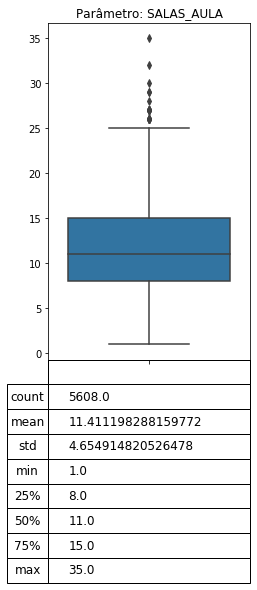

In [40]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_AULA')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_AULA', entretanto tal parametro esta relacionado ao numero de salas de aula de uma escola, logo é muito comum escolas com poucas ou muitas salas. Esse tipo de outlier faz sentido</p>

In [41]:
## Verificando a coluna 'SALAS_ED_INF'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_ED_INF')

## Verificar as primeiras escolas
df_out.head(5)

NOMEDEP                 DE           MUN         DISTR  CODESC  \
660   ESTADUAL - SE  BRAGANCA PAULISTA       SOCORRO       SOCORRO  912918   
991   ESTADUAL - SE      CARAGUATATUBA      ILHABELA      ILHABELA   11228   
1907  ESTADUAL - SE            ITAPEVA  CAPAO BONITO  CAPAO BONITO  926036   

                                 NOMESC  TIPOESC TIPOESC_DESC SITUACAO  \
660        HELENA JOSE BONFA PROFESSORA        8           EE    Ativa   
991   GABRIEL RIBEIRO DOS SANTOS DOUTOR        8           EE    Ativa   
1907          BAIRRO TURVO DOS ALMEIDAS        8           EE    Ativa   

      SALAS_AULA  SALAS_ED_INF  SALAS_ED_ESP  SALAS_ED_ART  SALA_RECURSO  \
660            4             1             0             0             0   
991           19             1             0             0             0   
1907           7             3             0             0             0   

      TOT_SALAS_AULA  AUDITORIO  ANFITEATRO  TEATRO  CANTINA  COPA  COZINHA  \
660                5          0           0       0        0     0        1   
991               20          0           0       0        1     1        4   
1907              10          0           0       0        0     0        1   

      REFEITORIO  DEPOSITO_ALIMENTOS  DESPENSA  TOT_DESPENSA  ...  \
660            0                   1         1             2  ...   
991            2                   0         1             1  ...   
1907           1                   0         1             1  ...   

      SALA_ENTRETENIMENTO  SALA_ESTAGIO  SALA_GINASTICA  SALA_INSUMO_AGRICOLA  \
660                     0             0               0                     0   
991                     0             0               0                     0   
1907                    0             0               0                     0   

      SALA_INSUMO_VETERINARIO  SALA_MARKETING  SALA_MATRICULA  SALA_MUSICA  \
660                         0               0               0            0   
991                         0               0               0            0   
1907                        0               0               0            0   

      SALA_POS_GRADUACAO  SALA_ORDENHA  SALA_PROC_PROD_AGROPECUARIOS  \
660                    0             0                             0   
991                    0             0                             0   
1907                   0             0                             0   

      SALA_SEGURANCA  SALA_TELEFONIA  SALA_FINANCEIRO  SALA_PASTORAL  \
660                0               0                0              0   
991                0               0                0              0   
1907               0               0                0              0   

      SALA_RESERV_AGUA  SERVIDOR  SILO  VARANDA  VIVEIRO  SALA_REORG_NEURO  \
660                  0         0     0        0        0                 0   
991                  0         0     0        0        0                 0   
1907                 0         0     0        0        0                 0   

      SALA_TERAPIA_OCUP  SALA_SERIGRAFIA  SALA_MARCENARIA  QUIOSQUE  
660                   0                0                0         0  
991                   0                0                0         0  
1907                  0                0                0         0  

[3 rows x 172 columns]

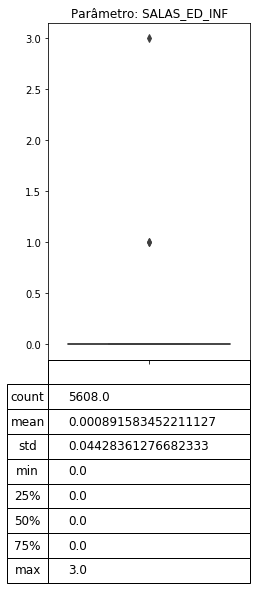

In [42]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_INF')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_ED_INF', entretanto tal parametro esta relacionado a salas de educação infantil, não é uma situação muito comum, mas faz sentido escolas terem salas para crianças, algo bem comum em pré-escolas.</p>

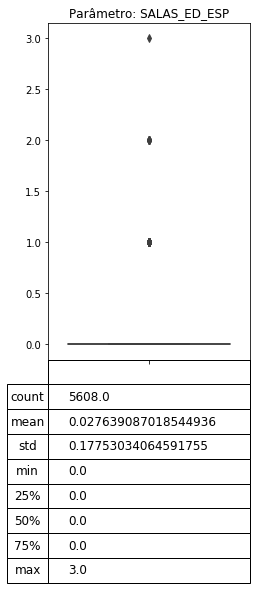

In [43]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ESP')

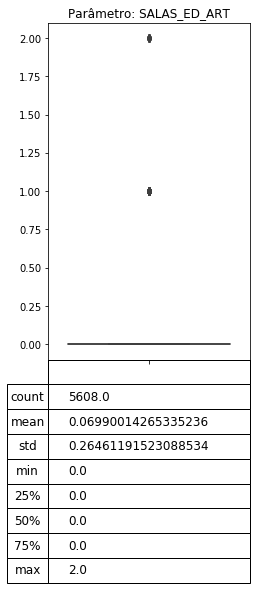

In [44]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ART')

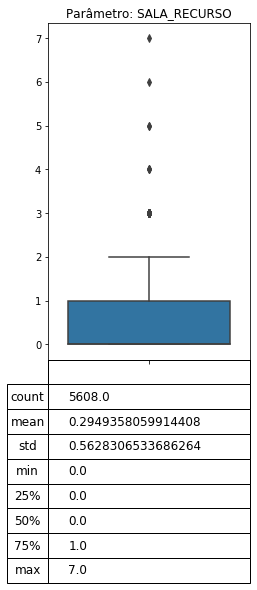

In [45]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_RECURSO')

<p>Os parâmetros 'SALAS_ED_ESP', 'SALAS_ED_ART' 'SALA_RECURSO' referem-se respectivamente a salas de educação especial, salas de educação artística e salas de recurso que nada mais são do que salas extras com propositos distintos, não é incomum escolas terems salas e recursos distintos.</p>

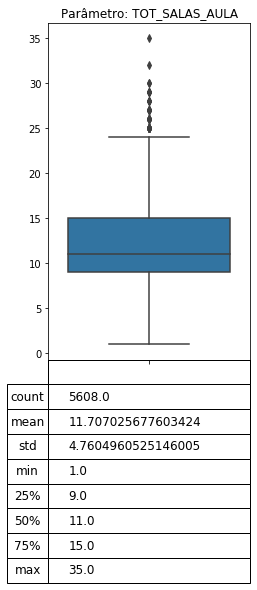

In [46]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALAS_AULA')

<p>Dado que existem escolas pequenas e grandes no dataset bem como escolas com salas distintas das demais, como sala de educação artística, é comum haver outliers no total de salas. Para evitar problemas futuros de multicolinearidade, os hiperparametros referentes as salas serão removidos, pois o 'TOT_SALAS_AULA' possui o valor agrupado.</p>

In [47]:
## Dado as possiveis alterações, uma copia deverá ser feita
df_school_dependecy_treat = df_school_dependecy.copy(deep = True)

## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SALAS_ED_INF', 'SALAS_ED_ESP', 
                                                     'SALAS_ED_ART', 'SALA_RECURSO',
                                                     'SALAS_AULA'])

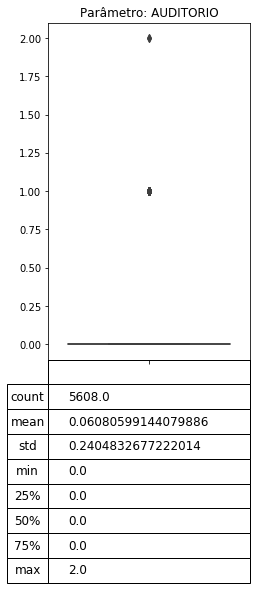

In [48]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AUDITORIO')

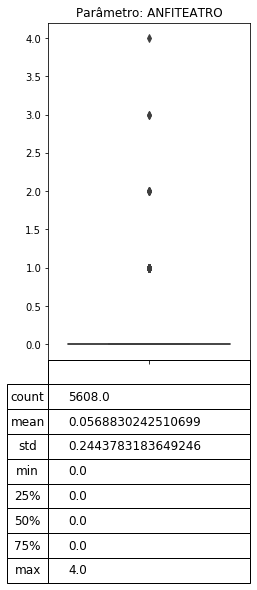

In [49]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ANFITEATRO')

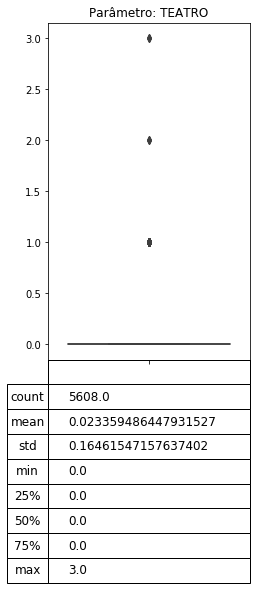

In [50]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TEATRO')

<p>Os parametros referentes ao auditorio, anfiteatro e teatro apresentam muitos outliers, mas faz sentido essa discrepancia por que há escolas com tais dependencias ou não, e algumas com mais de uma.</p>

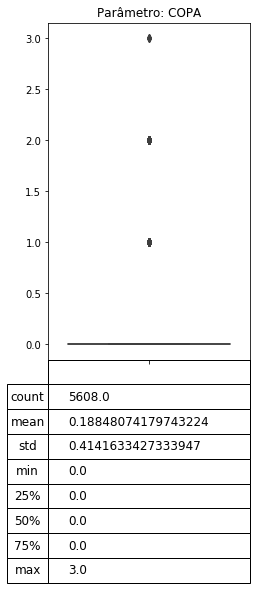

In [51]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COPA')

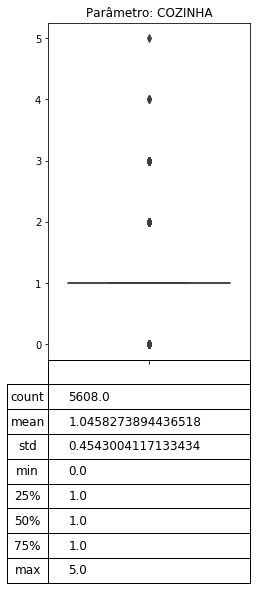

In [52]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COZINHA')

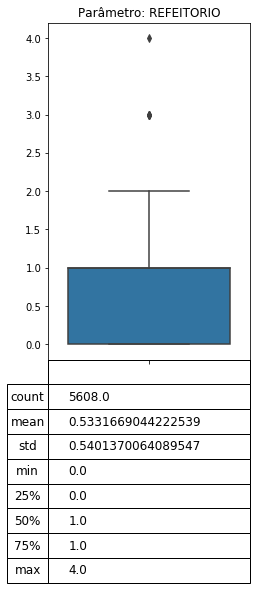

In [53]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'REFEITORIO')

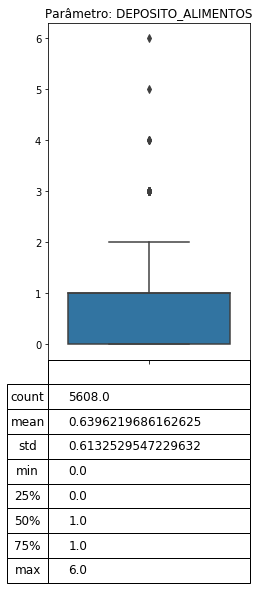

In [54]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPOSITO_ALIMENTOS')

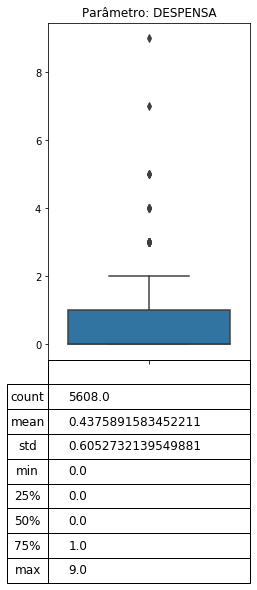

In [55]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DESPENSA')

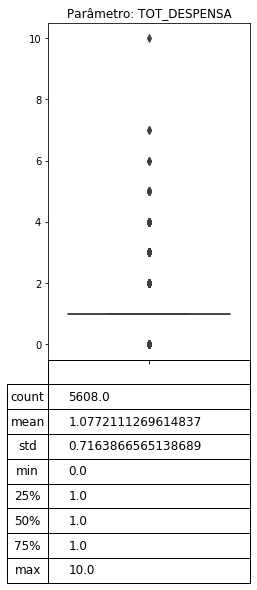

In [56]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_DESPENSA')

<p>As informações mostradas anteriormente se referem a alimentação como um todo nas escolas, onde os principais parametros relacionados a cozinha forma mostrados e em todos foram identificados outliers. O parametro com uma quantidade elevada de outliers foi o 'TOT_DESPENSA' que basicamente é oriundo de um calculo envolvendo os demais parametros. Nesse primeiro momento e devido a quantidade de outliers ele será removido do dataframe.</p>

In [57]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_DESPENSA'])

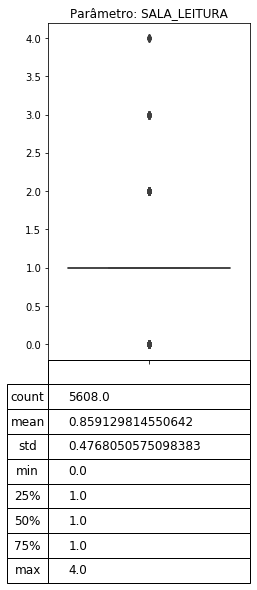

In [58]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_LEITURA')

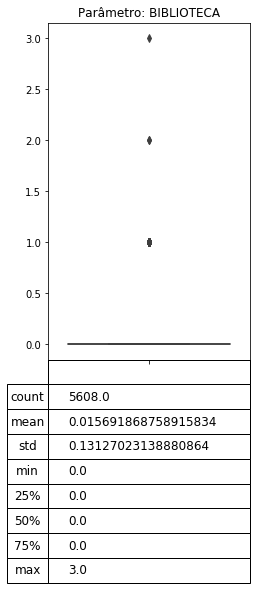

In [59]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'BIBLIOTECA')

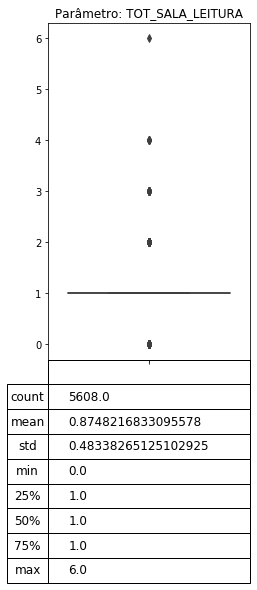

In [60]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALA_LEITURA')

<p>Os parâmetros referentes a quantidade de salas de leitura e bibliotecas, fazem sentido pra regra de negocio. Entretanto a variavel TOT_SALA_LEITURA será removido pois seus dados ja são refletidos nas demais variaveis.</p>

In [61]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_SALA_LEITURA'])

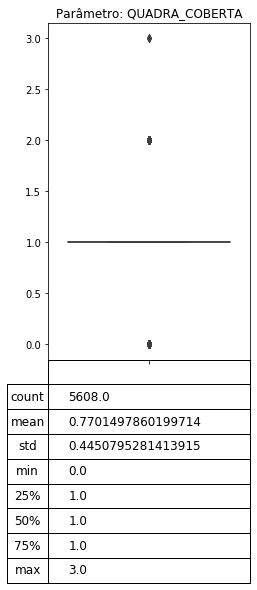

In [62]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_COBERTA')

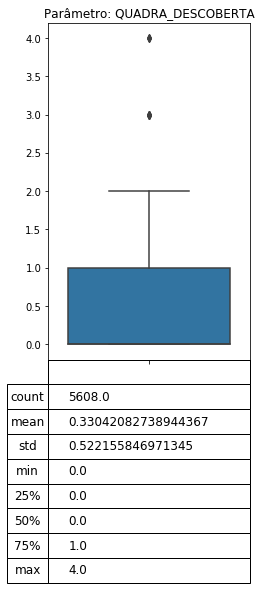

In [63]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_DESCOBERTA')

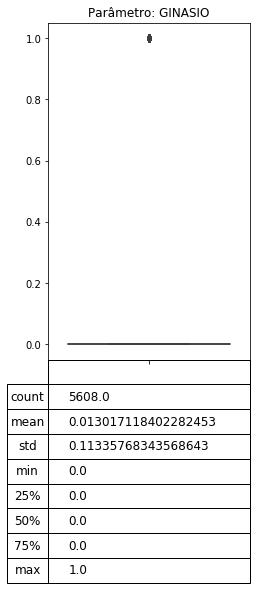

In [64]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GINASIO')

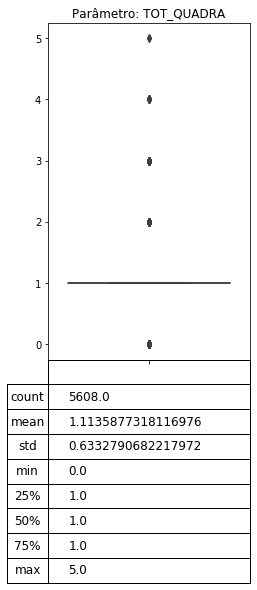

In [65]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_QUADRA')

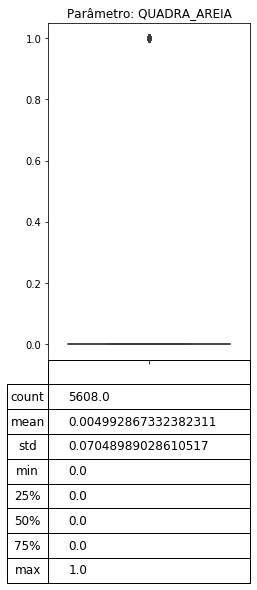

In [66]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_AREIA')

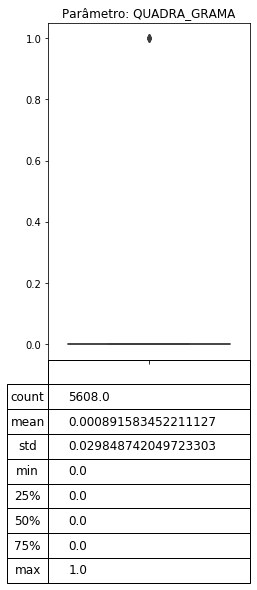

In [67]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_GRAMA')

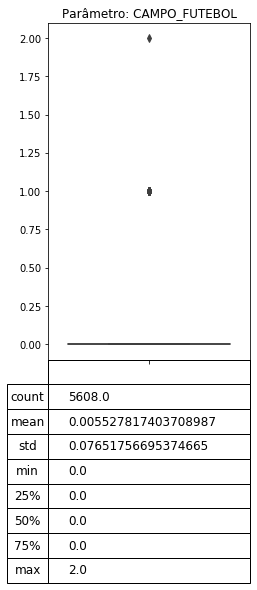

In [68]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CAMPO_FUTEBOL')

<p>Os outliers apresentados das colunas <b>QUADRA_COBERTA, QUADRA_DESCOBERTA, GINASIO, TOT_QUADRA, QUADRA_AREIA, QUADRA_GRAMA e CAMPO_FUTEBOL </b>são referentes as quadras e ginasios, e os valores apresentados nos boxplots não apresentam nenhuma discrepancia do comum, portanto eles serão mantidos. A unica alteração feita será a exclusão da TOT_QUADRA pois o que ela representa ja esta relacionado aos demais parametros.</p>

In [69]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_QUADRA'])

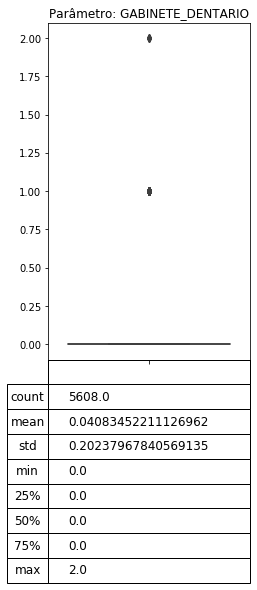

In [70]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GABINETE_DENTARIO')

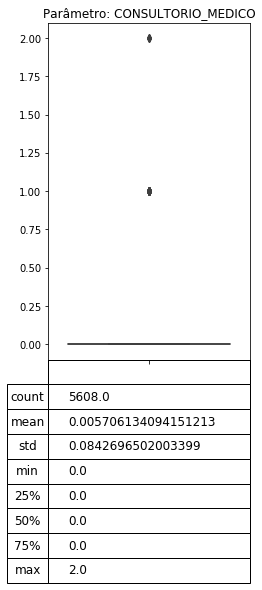

In [71]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CONSULTORIO_MEDICO')

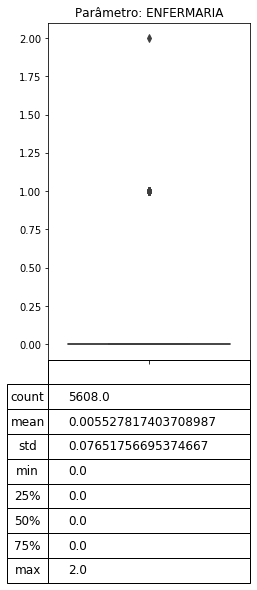

In [72]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ENFERMARIA')

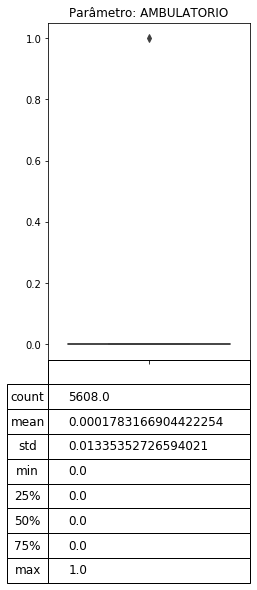

In [73]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AMBULATORIO')

<p>Os hiperparâmetros <b>AMBULATORIO, ENFERMARIA, CONSULTORIO_MEDICO e GABINETE_DENTARIO</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

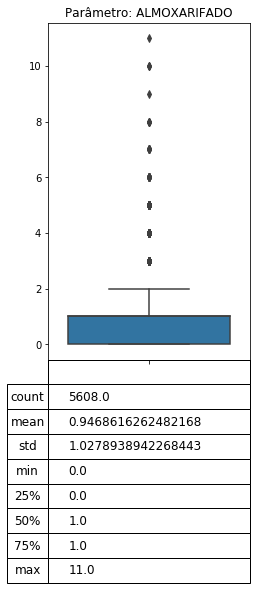

In [74]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALMOXARIFADO')

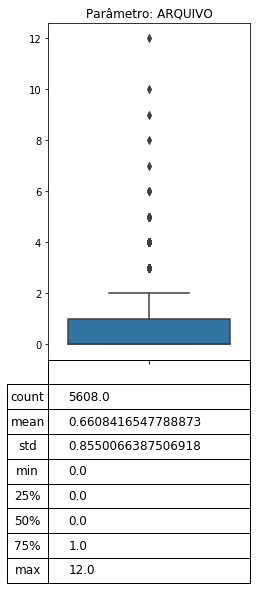

In [75]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ARQUIVO')

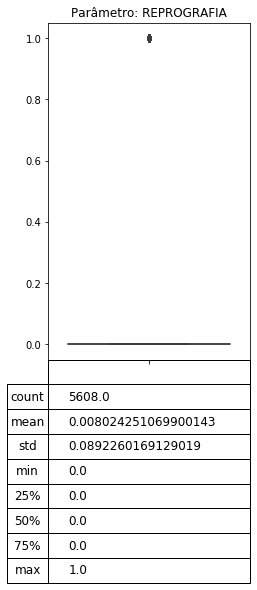

In [76]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'REPROGRAFIA')

<p>Os hiperparâmetros <b>ALMOXARIFADO, ARQUIVO, e REPROGRAFIA</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

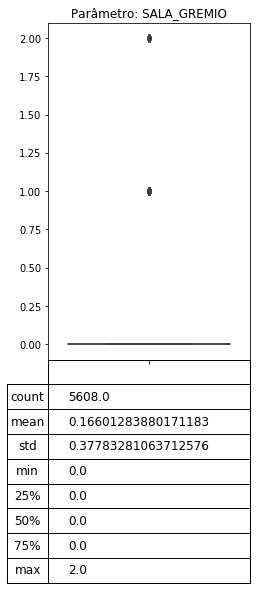

In [77]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_GREMIO')

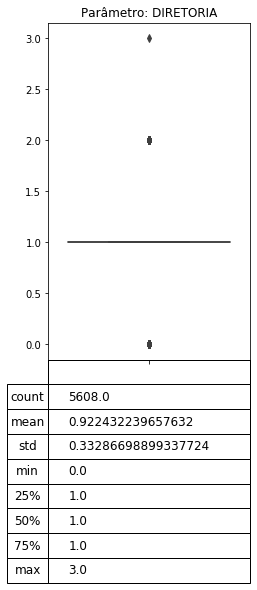

In [78]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DIRETORIA')

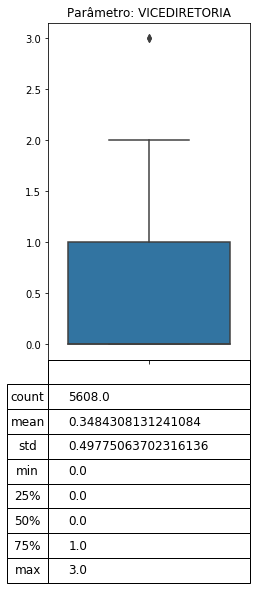

In [79]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VICEDIRETORIA')

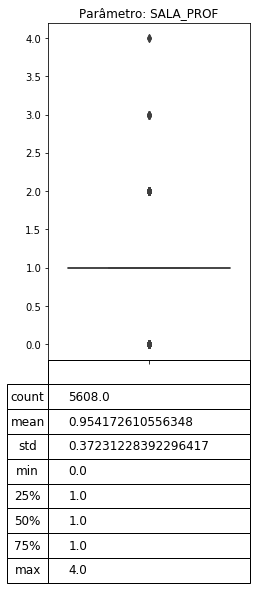

In [80]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_PROF')

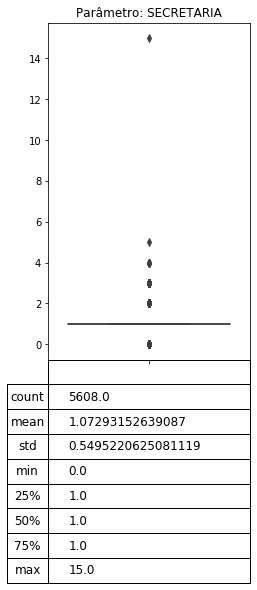

In [81]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SECRETARIA')

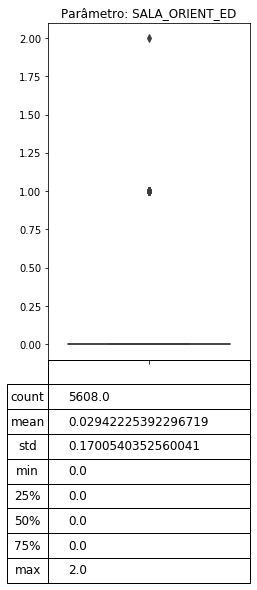

In [82]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_ORIENT_ED')

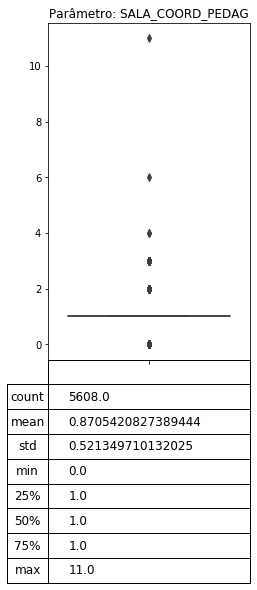

In [83]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_COORD_PEDAG')

<p>Os hiperparâmetros <b>SALA_GREMIO, DIRETORIA, VICEDIRETORIA, SALA_PROF, SECRETARIA, SALA_ORIENT_ED e SALA_COORD_PEDAG, e REPROGRAFIA</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

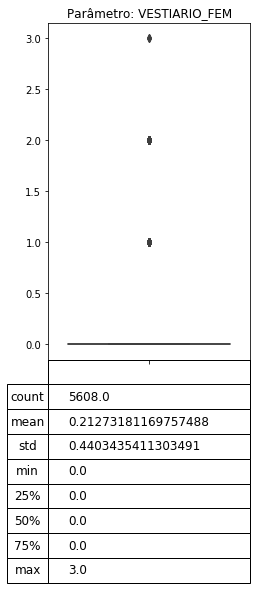

In [84]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VESTIARIO_FEM')

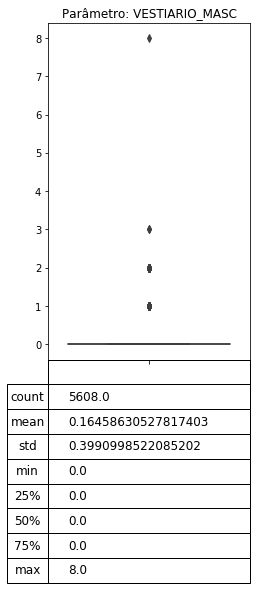

In [85]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VESTIARIO_MASC')

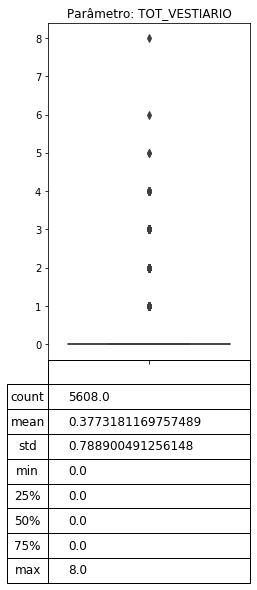

In [86]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_VESTIARIO')

<p>Os hiperparâmetros <b>VESTIARIO_FEM, VESTIARIO_MASC, e TOT_VESTIARIO</b> por mais que apresentem outliers, nenhum deles é discrepante, e além do mais fazem sentido para o negocio, todavia para evitar multicolinearidade, iremos retirar o hiperparametro 'TOT_VESTIARIO'</p>

In [87]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_VESTIARIO'])

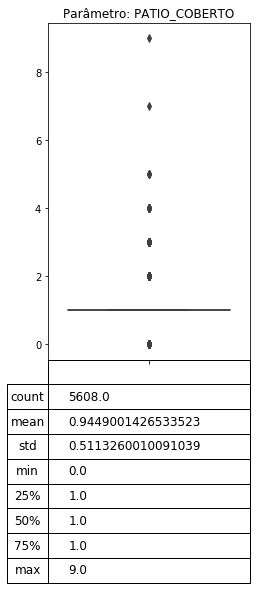

In [88]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PATIO_COBERTO')

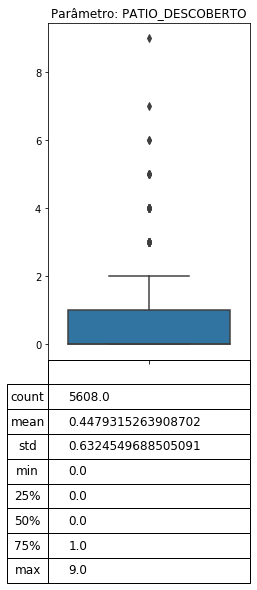

In [89]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PATIO_DESCOBERTO')

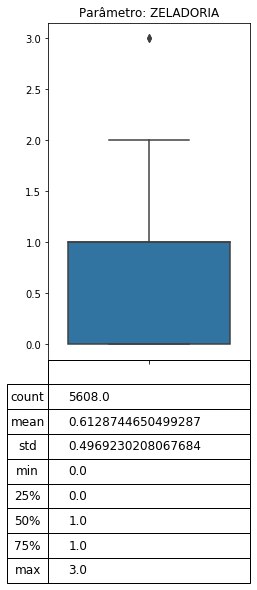

In [90]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ZELADORIA')

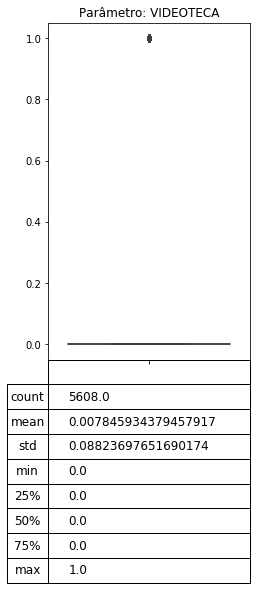

In [91]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VIDEOTECA')

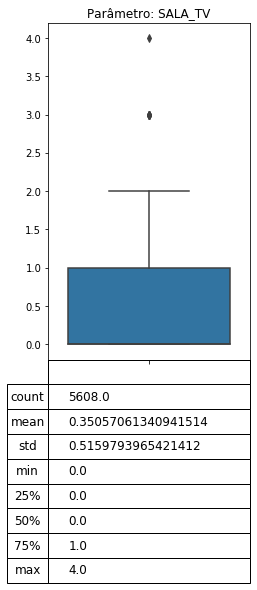

In [92]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_TV')

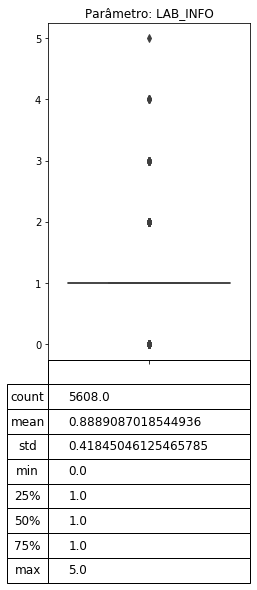

In [93]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_INFO')

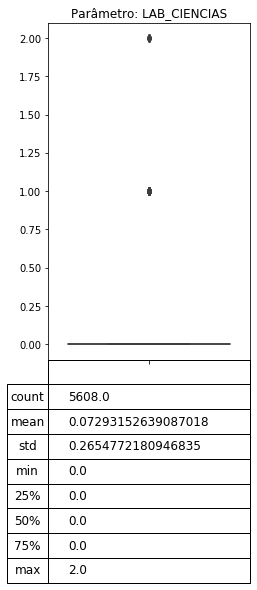

In [94]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_CIENCIAS')

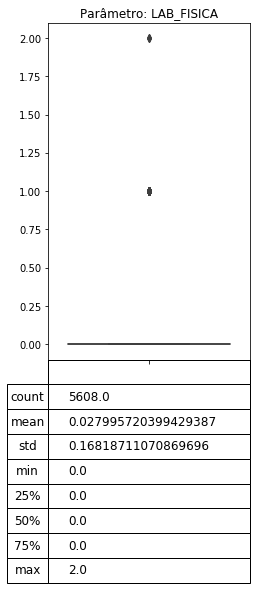

In [95]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_FISICA')

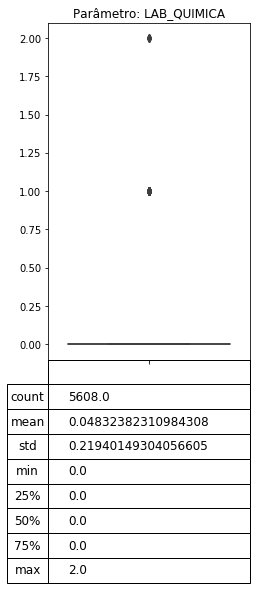

In [96]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_QUIMICA')

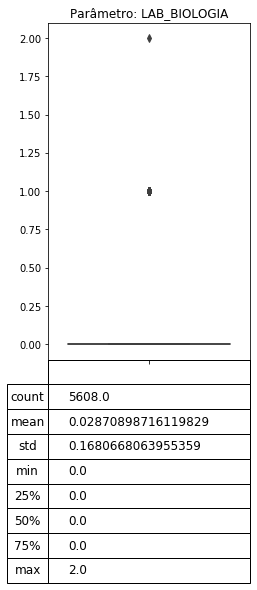

In [97]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_BIOLOGIA')

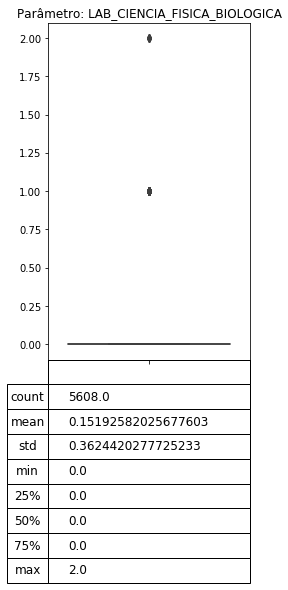

In [98]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_CIENCIA_FISICA_BIOLOGICA')

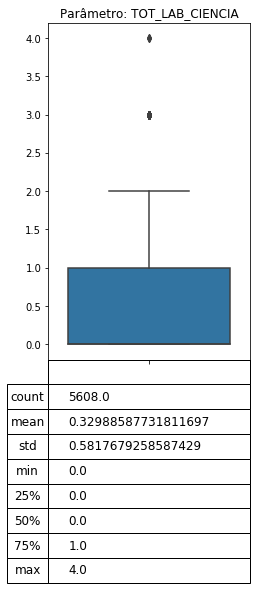

In [99]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_LAB_CIENCIA')

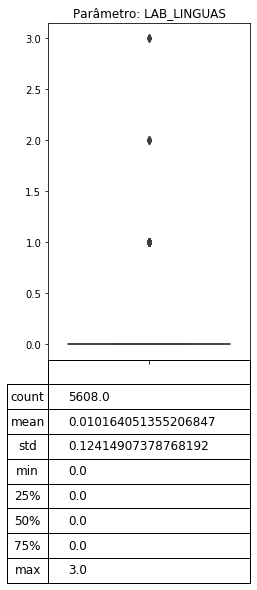

In [100]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_LINGUAS')

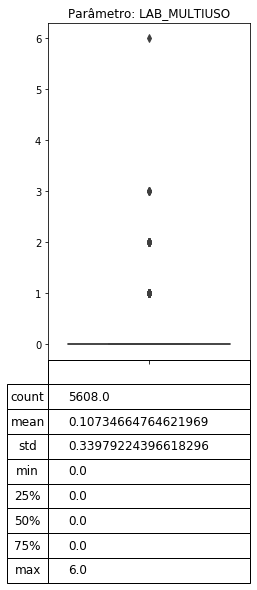

In [101]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_MULTIUSO')

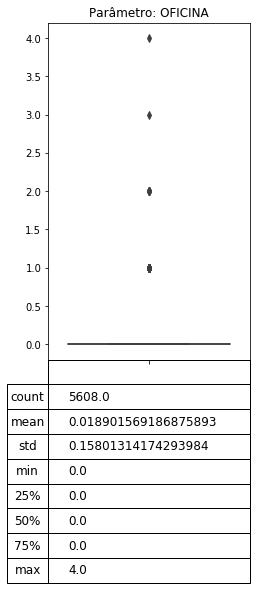

In [102]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'OFICINA')

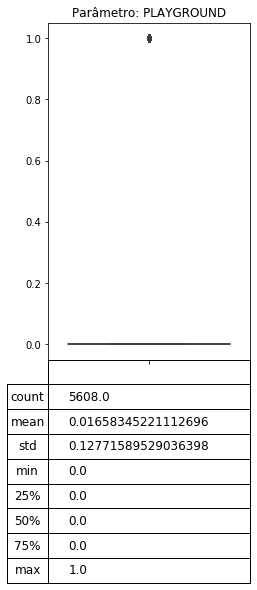

In [103]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PLAYGROUND')

<p>Os hiperparâmetros <b>VIDEOTECA, SALA_TV, LAB_INFO, LAB_CIENCIAS, LAB_FISICA, LAB_QUIMICA, LAB_BIOLOGIA, LAB_CIENCIA_FISICA_BIOLOGICA, TOT_LAB_CIENCIA, LAB_LINGUAS, LAB_MULTIUSO, OFICINA e PLAYGROUND</b> possuem muitos outliers, entretanto esses outliers são explicados pelo negócio. Os unicos hiperparametros que serão alterados serão 'LAB_CIENCIA_FISICA_BIOLOGICA' e 'TOT_LAB_CIENCIA', que nesse caso serão removidos por serem um valor agrupado dos hiperparametros ja passados.</p>

In [104]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['LAB_CIENCIA_FISICA_BIOLOGICA', 'TOT_LAB_CIENCIA'])

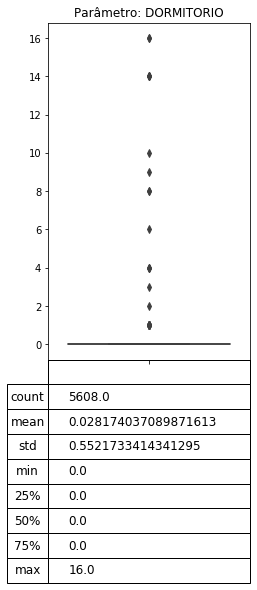

In [105]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DORMITORIO')

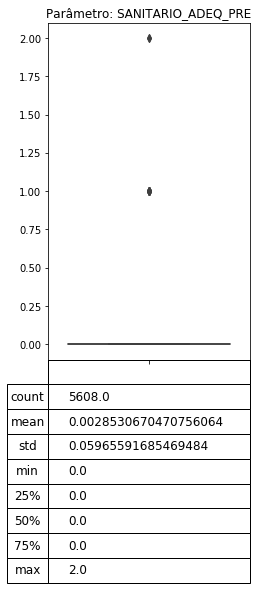

In [106]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE')

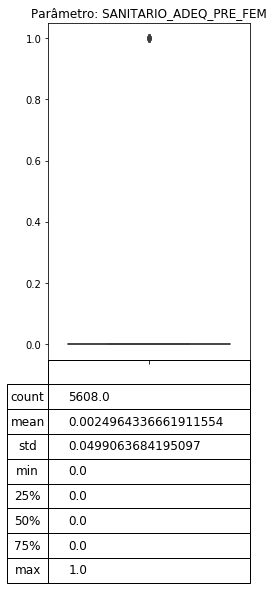

In [107]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE_FEM')

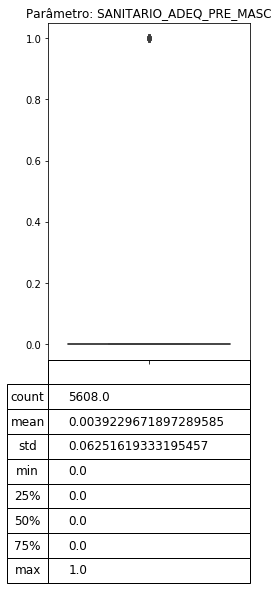

In [108]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE_MASC')

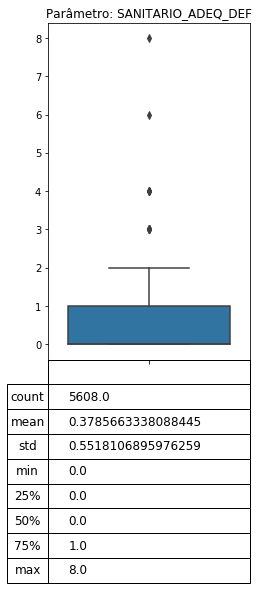

In [109]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF')

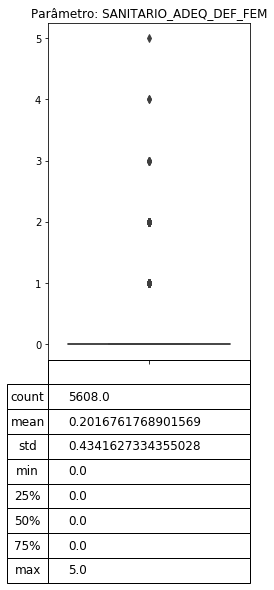

In [110]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF_FEM')

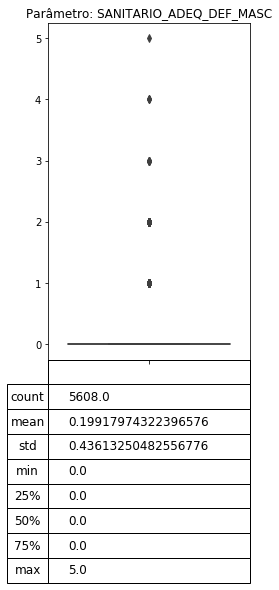

In [111]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF_MASC')

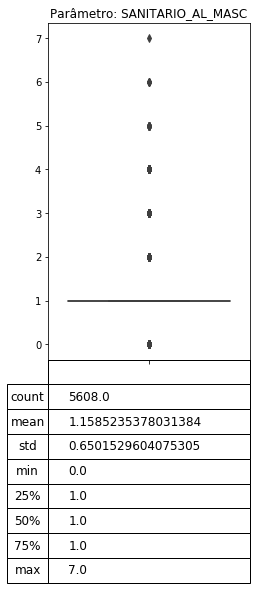

In [112]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_AL_MASC')

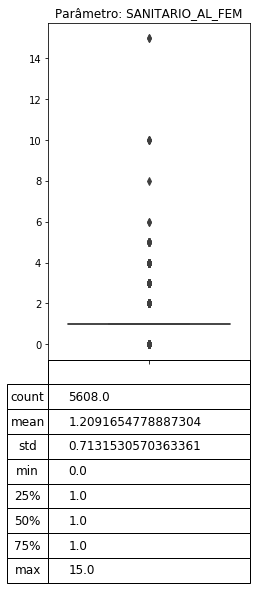

In [113]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_AL_FEM')

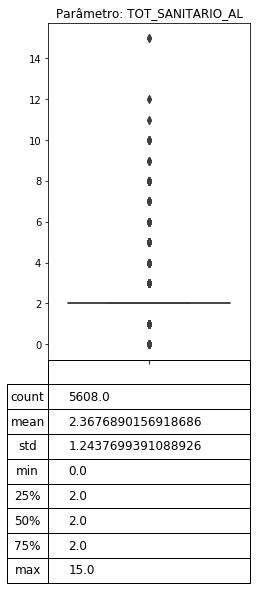

In [114]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_AL')

<p>Os outliers referentes aos hiperparâmetros <b>DORMITORIO, SANITARIO_ADEQ_PRE, SANITARIO_ADEQ_PRE_FEM, SANITARIO_ADEQ_PRE_MASV, SANITARIO_ADEQ_DEF, SANITARIO_ADEQ_DEF_FEM, SANITARIO_ADEQ_DEF_MASC, SANITARIO_AL_MASC, SANITARIO_AL_FEM E TOT_SANITATIO_AL</b> são congruentes com o negocio, sendo assim eles podem ser mantido , entretanto, como alguns deles se referem a diferentes tipos de sanitarios, os unicos hiperparametros que serão mantidos dessa leva serão 'DORMITORIO' e 'TOT_SANITAIO_AL'</p>

In [115]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SANITARIO_ADEQ_PRE_FEM', 'SANITARIO_ADEQ_PRE', 
                                                     'SANITARIO_ADEQ_PRE_MASC', 'SANITARIO_ADEQ_DEF',
                                                     'SANITARIO_ADEQ_DEF_FEM', 'SANITARIO_ADEQ_DEF_MASC',
                                                     'SANITARIO_AL_MASC', 'SANITARIO_AL_FEM'])

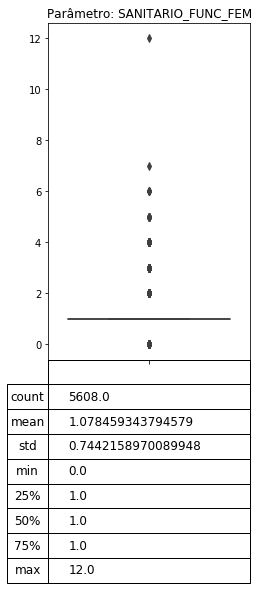

In [116]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_FUNC_FEM')

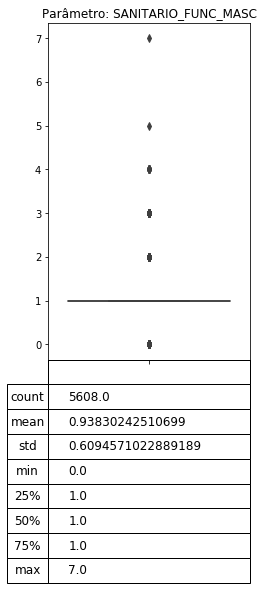

In [117]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_FUNC_MASC')

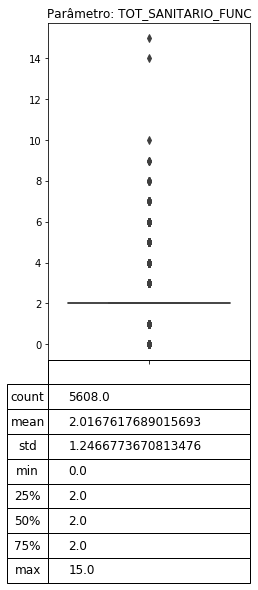

In [118]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

<p>Assim como foi adotado anteriormente em relação aos sanitarios dos alunos, faremos com os sanitarios dos funcionarios, manteremos apenas o hiperparametro 'TOT_SANITARIO_FUNC'</p>

In [119]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SANITARIO_FUNC_FEM', 'SANITARIO_FUNC_MASC'])

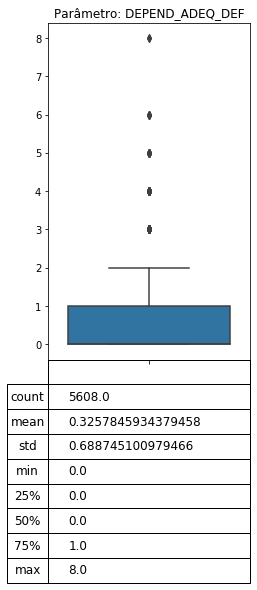

In [120]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPEND_ADEQ_DEF')

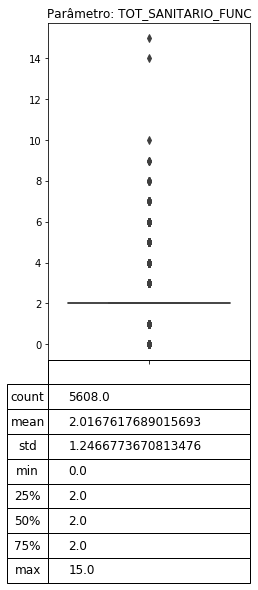

In [121]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

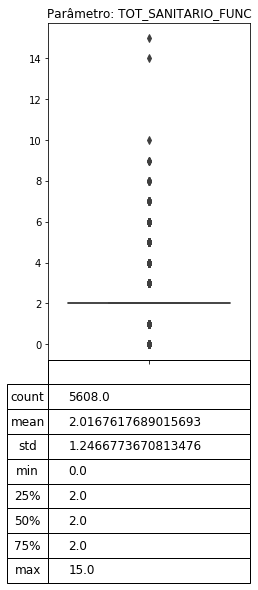

In [122]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

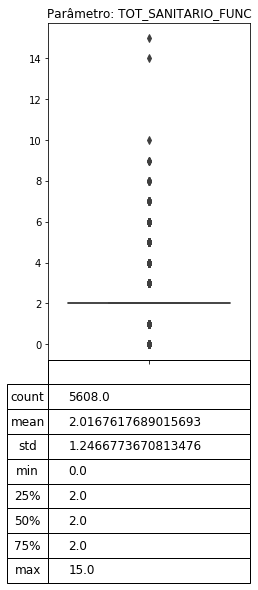

In [123]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

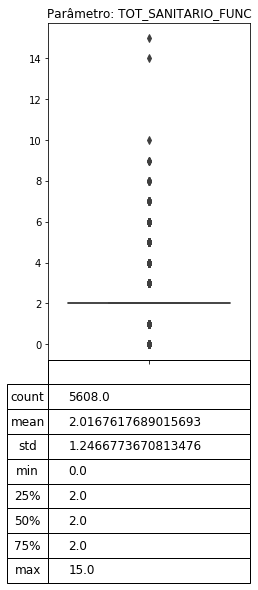

In [124]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

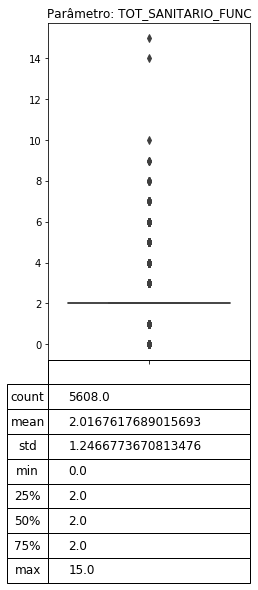

In [125]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

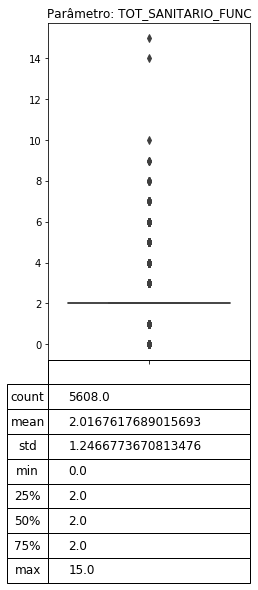

In [126]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

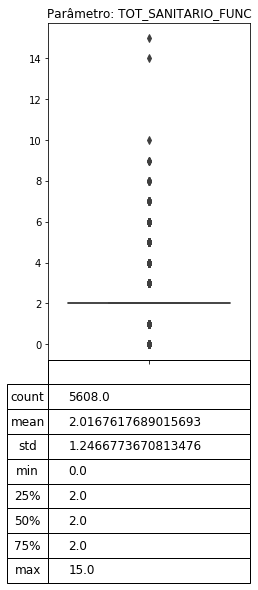

In [127]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

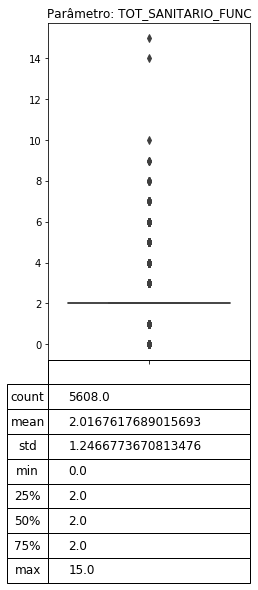

In [128]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

<p>Os outliers referentes aos hiperparametros: <b>DEPEND_ADEQ_DEF, SALA_ED_FISICA, PISCINA, PORTARIA, SALA_PROG_ESC_FAMILIA, BRINQUEDOTECA, FRALDARIO, LAVANDERIA e SOLARIO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

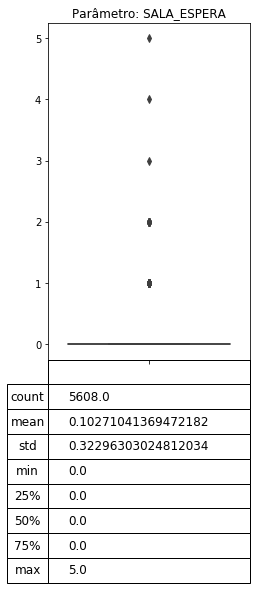

In [129]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_ESPERA')

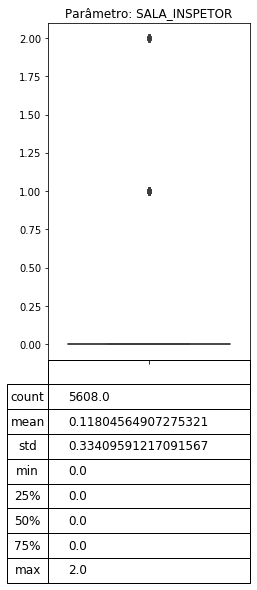

In [130]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_INSPETOR')

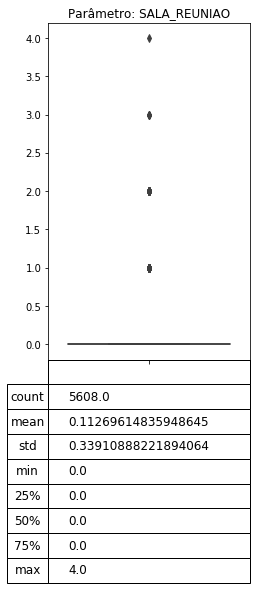

In [131]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_REUNIAO')

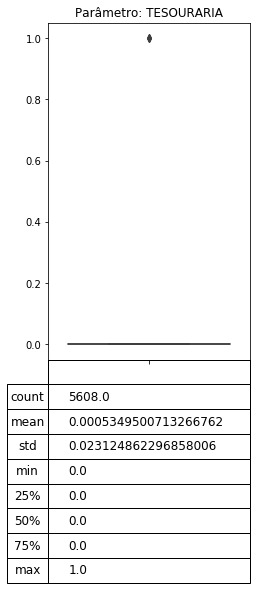

In [132]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TESOURARIA')

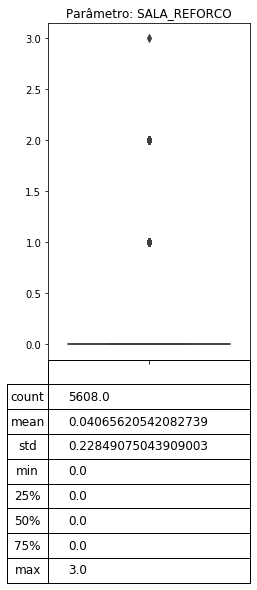

In [133]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_REFORCO')

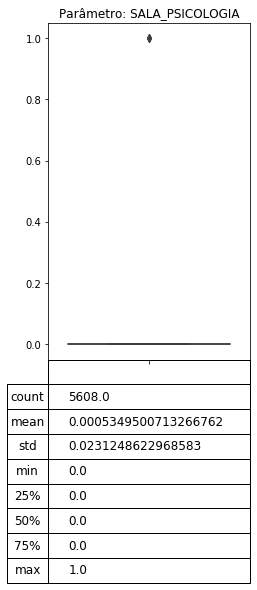

In [134]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_PSICOLOGIA')

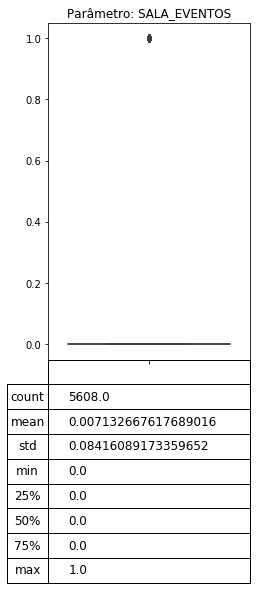

In [135]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_EVENTOS')

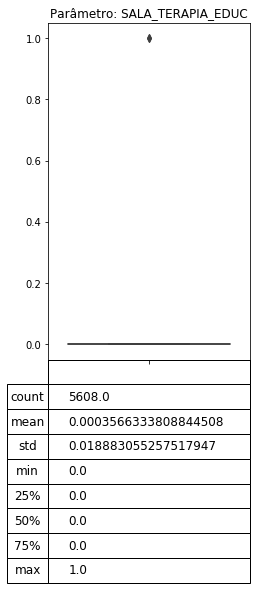

In [136]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_TERAPIA_EDUC')

<p>Os outliers referentes aos hiperparametros: <b>SALA_ESPERA, SALA_INSPETOR, SALA_REUNIAO, TESOURARIA, SALA_REFORCO, SALA_PSICOLOGIA, SALA_EVENTOS, e SALA_TERAPIA_EDUC</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

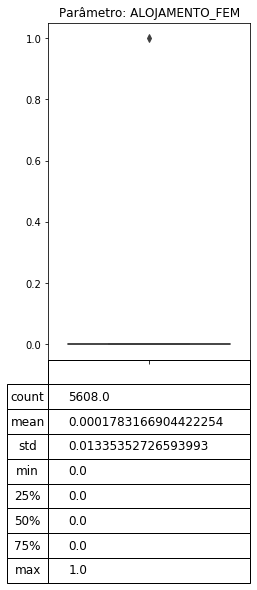

In [137]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALOJAMENTO_FEM')

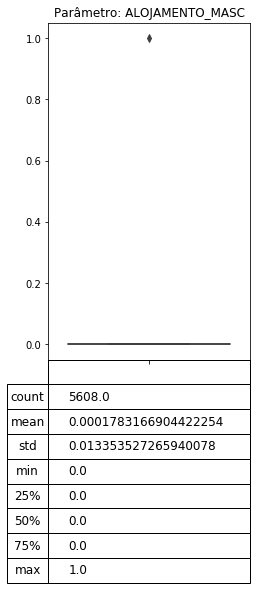

In [138]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALOJAMENTO_MASC')

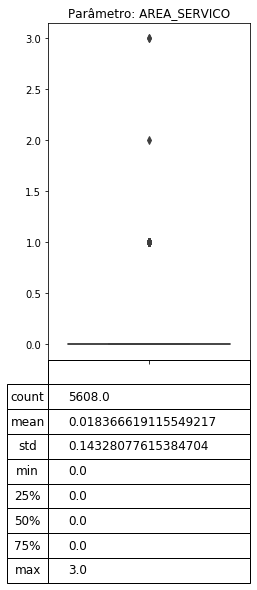

In [139]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AREA_SERVICO')

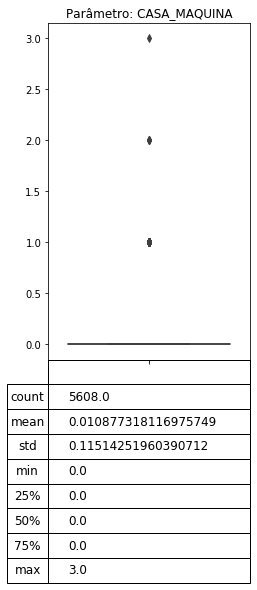

In [140]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CASA_MAQUINA')

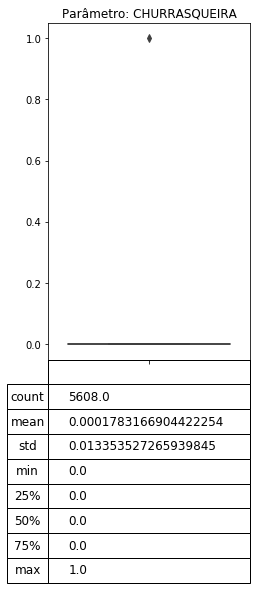

In [141]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CHURRASQUEIRA')

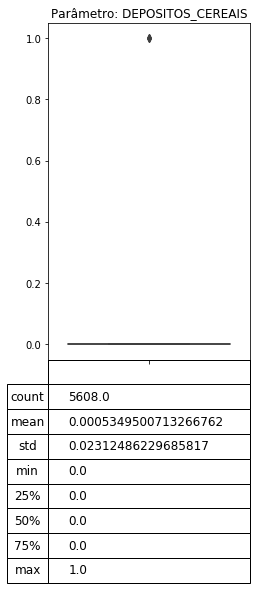

In [142]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPOSITOS_CEREAIS')

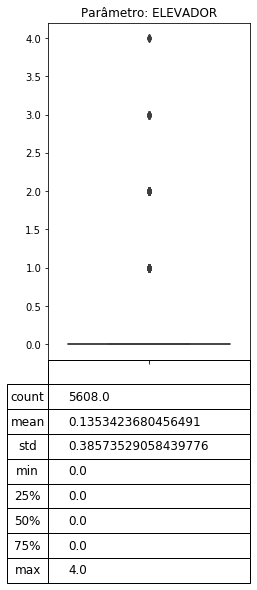

In [143]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ELEVADOR')

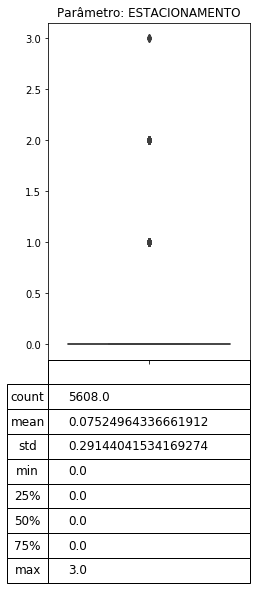

In [144]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ESTACIONAMENTO')

<p>Os outliers referentes aos hiperparametros: <b>ALOJAMENTO_FEM, ALOJAMENTO_MASC, TOT_ALOJAMENTO, AREA_SERVICO, CASA_MAQUINA, CHURRASQUEIRA, DEPOSITOS_CEREAIS, ELEVADOR e ESTACIONAMENTO</b> são congruentes com o negocio, sendo assim eles serão mantidos, com exceção das colunas 'ALOJAMENTO_FEM' e 'ALOJAMENTO_MASC' ja que temos uma coluna representanto seu total.</p>

In [145]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['ALOJAMENTO_FEM', 'ALOJAMENTO_MASC'])

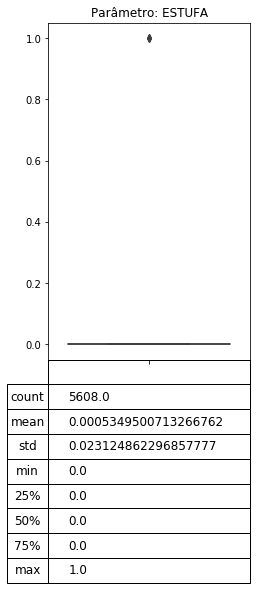

In [146]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ESTUFA')

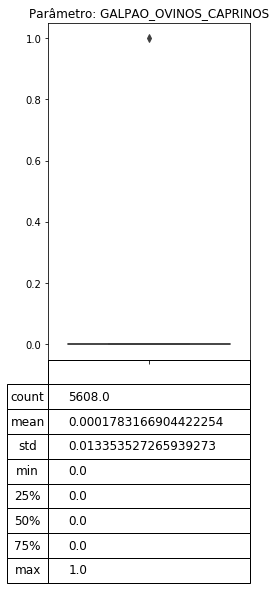

In [147]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GALPAO_OVINOS_CAPRINOS')

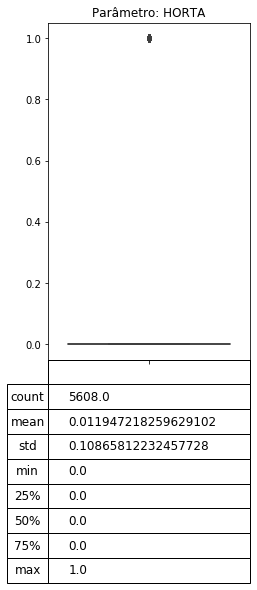

In [148]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'HORTA')

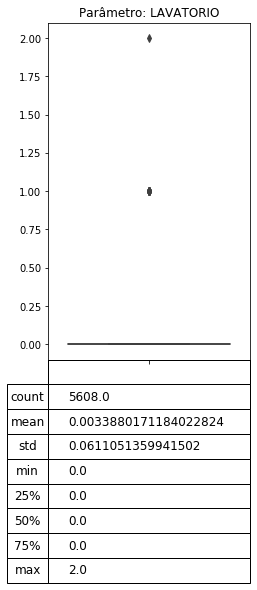

In [149]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAVATORIO')

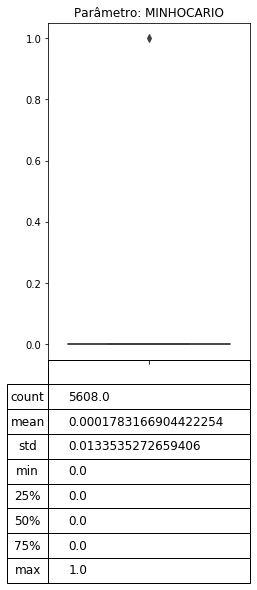

In [150]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'MINHOCARIO')

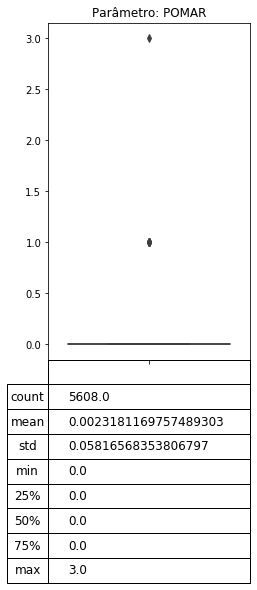

In [151]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'POMAR')

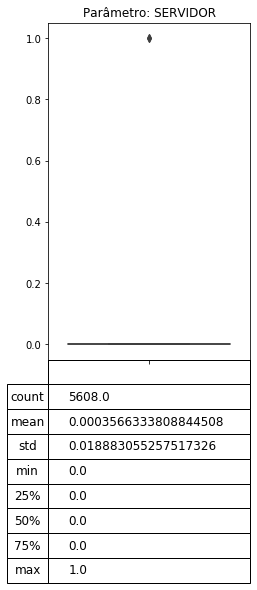

In [152]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SERVIDOR')

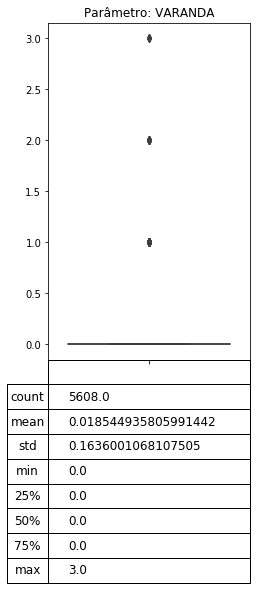

In [153]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VARANDA')

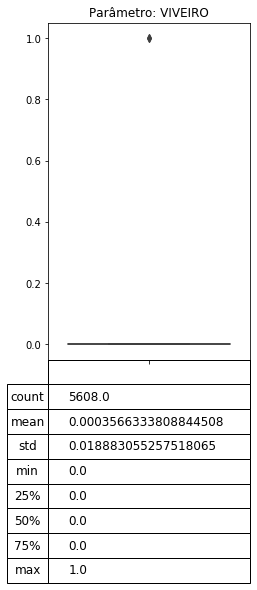

In [154]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VIVEIRO')

<p>Os outliers referentes aos hiperparametros: <b>ESTUFA, GALPAO_OVINOS_CAPRINOS, HORTA, LAVATORIO, MINHOCARIO, POMAR, SERVIDOR, VARANDA e VIVEIRO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

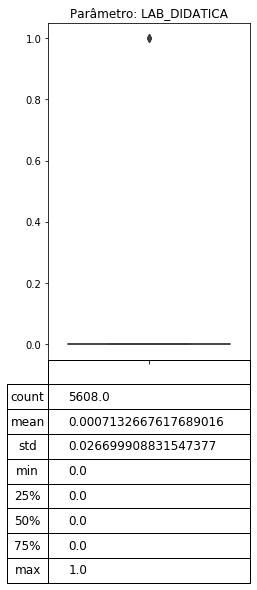

In [155]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_DIDATICA')

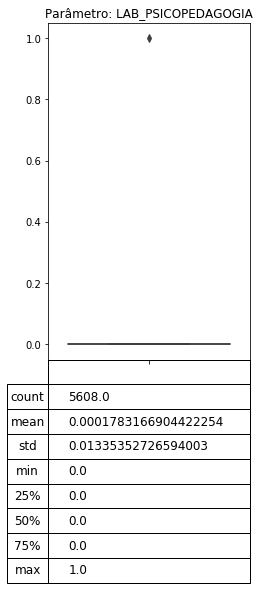

In [156]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_PSICOPEDAGOGIA')

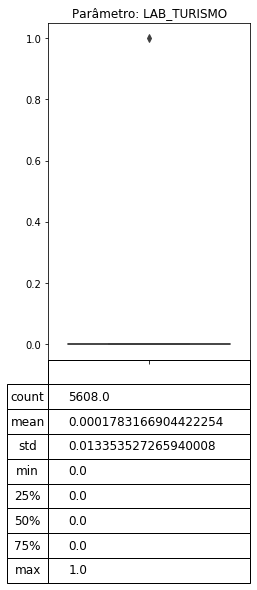

In [157]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_TURISMO')

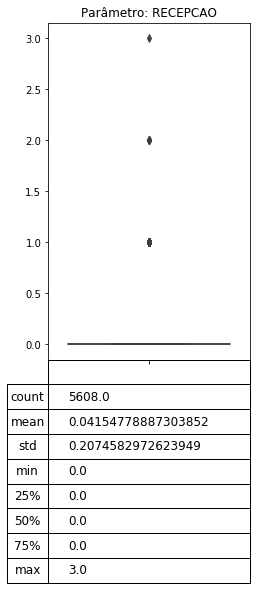

In [158]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'RECEPCAO')

<p>Os outliers referentes aos hiperparametros: <b>LAB_DIDATICA, LAB_PSICOPEDAGOGIA, LAB_TURISMO e RECEPCAO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

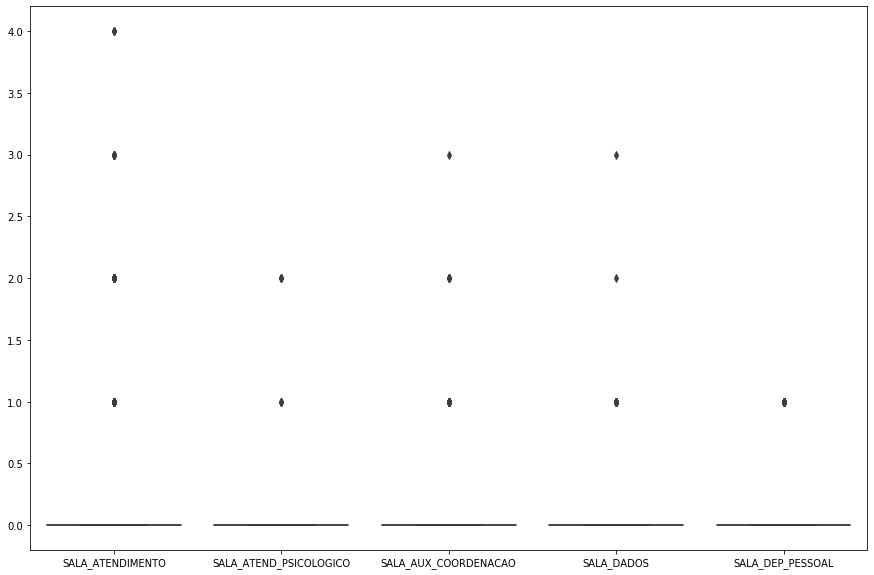

In [159]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_ATENDIMENTO', 'SALA_ATEND_PSICOLOGICO', 
                                                    'SALA_AUX_COORDENACAO', 'SALA_DADOS',
                                                    'SALA_DEP_PESSOAL']])

## Exibir gráfico
plt.show()

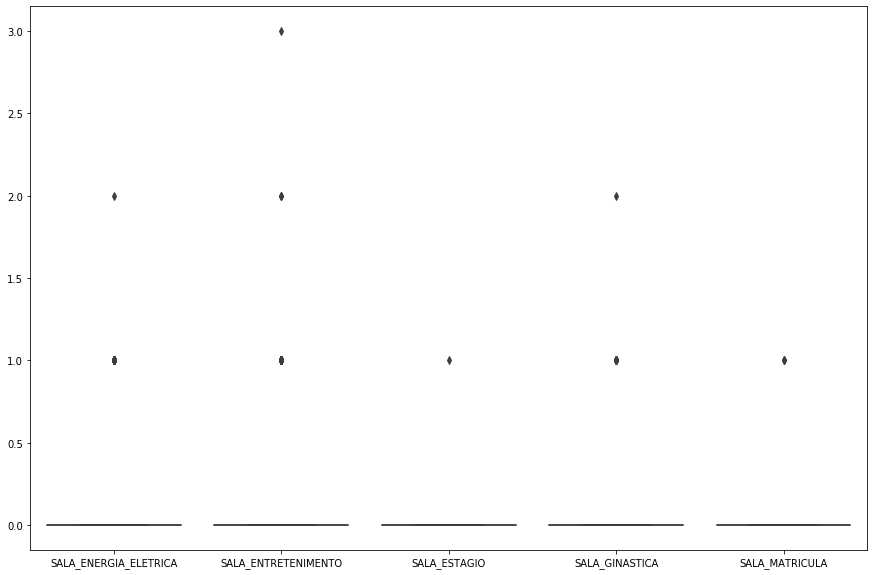

In [160]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_ENERGIA_ELETRICA', 'SALA_ENTRETENIMENTO', 
                                                    'SALA_ESTAGIO', 'SALA_GINASTICA',
                                                    'SALA_MATRICULA']])

## Exibir gráfico
plt.show()

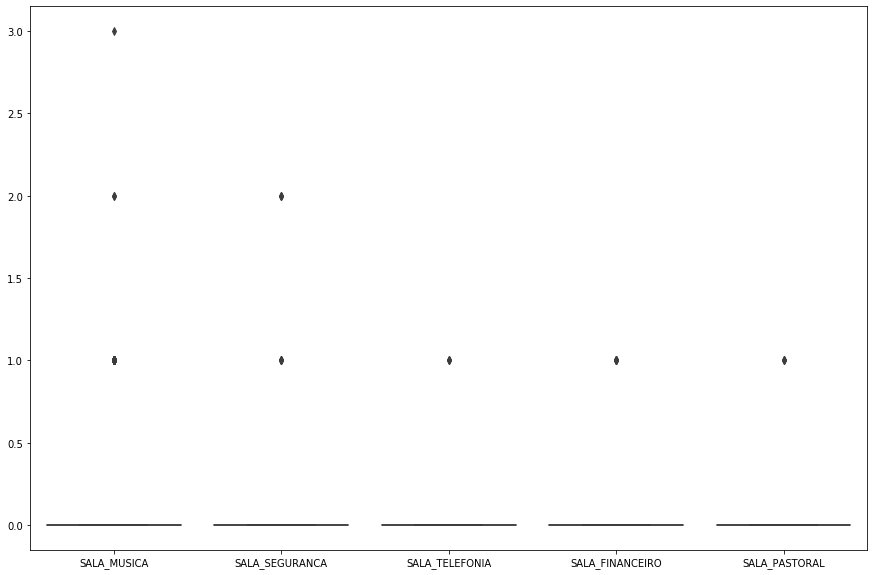

In [161]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_MUSICA', 'SALA_SEGURANCA', 
                                                    'SALA_TELEFONIA', 'SALA_FINANCEIRO',
                                                    'SALA_PASTORAL']])

## Exibir gráfico
plt.show()

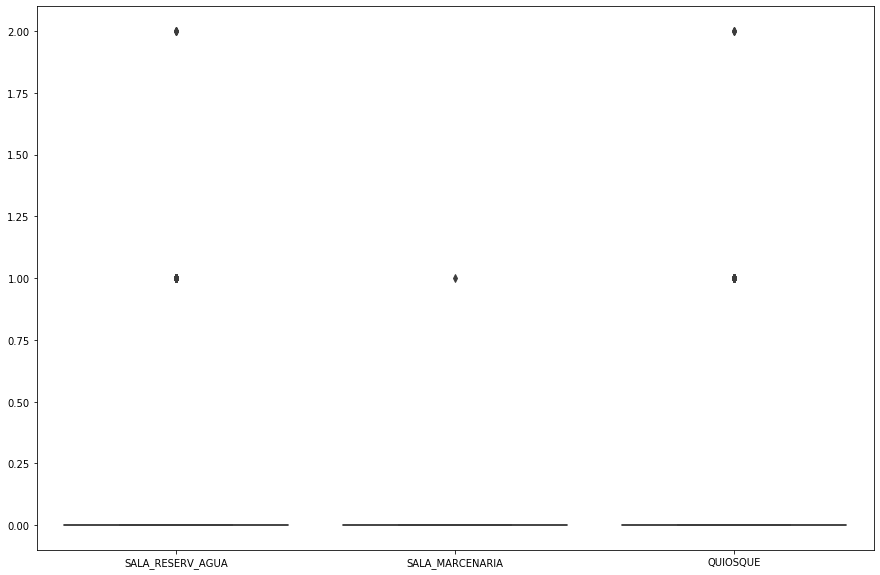

In [162]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_RESERV_AGUA', 'SALA_MARCENARIA', 
                                                    'QUIOSQUE']])

## Exibir gráfico
plt.show()

<p>Os outliers referentes aos hiperparametros: <b>SALA_ATENDIMENTO, SALA_ATEND_PSICOLOGICO, SALA_AUX_COORDENACAO, SALA_DADOS, SALA_DEP_PESSOAL, SALA_ENERGIA_ELETRICA, SALA_ENTRETENIMENTO, SALA_ESTAGIO, SALA_GINASTICA, SALA_MATRICULA, SALA_MUSICA, SALA_SEGURANCA, SALA_TELEFONIA, SALA_FINANCEIRO, SALA_PASTORAL, SALA_RESERV_AGUA, SALA_MARCENARIA e QUIOSQUE</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

<a id = 'head3_7'></a>
<h3>7. Distribuição de frequencia dos dados qualitativos</h3>

In [163]:
def fn_frequency_distribution(p_df_dataframe, p_column):
    """
    Description:
        Função que computa o as distribuições de frequencia 
        absoluta e relativa de um dado dataframe e coluna

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        -- Um pandas dataframe com os dados das frequencias
    
    Exception:
        None
    """
    ## Dataframe com os dados agrupados
    df_freq_dist = pd.DataFrame(p_df_dataframe \
                                   .groupby(p_column)[p_column] \
                                   .agg('count'))
    ## Renomeando a coluna para corresponder a frequencia absoluta
    df_freq_dist = df_freq_dist \
                        .rename(columns = {p_column : 'Frequencia Absoluta'}) \
                        .sort_values(by = 'Frequencia Absoluta', ascending = False)
    
    ## Somatorio das frequencias absolutas
    sum_columns = df_freq_dist['Frequencia Absoluta'].sum()
    
    ## Criação da frequencia relativa
    df_freq_dist['Frequencia Relativa'] = df_freq_dist \
                                                .groupby(level = 0) \
                                                .apply(lambda x : 100 * x/ sum_columns)
    
    return df_freq_dist

<a id = 'head4_71'></a>
<h4>7.1. Distribuição no 'df_school_geolocation'</h4>
<p>De acordo com os tipos dos dados apresentados no dataframe os hiperparâmetros que serão utilizados na distribuição de frequencia, são: <b>NOMEDEP, DE, MUN, DISTR, TIPOESC e ZONA</b></p>

In [164]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'NOMEDEP')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
NOMEDEP                                                
ESTADUAL - SE                 5736                100.0

In [165]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'DE')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
DE                                                      
RIBEIRAO PRETO                  118             2.057183
SUL 3                           114             1.987448
CENTRO OESTE                    109             1.900279
MAUA                            109             1.900279
NORTE 1                         106             1.847978

In [166]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'MUN')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
MUN                                                  
SAO PAULO                   1207            21.042538
GUARULHOS                    177             3.085774
CAMPINAS                     175             3.050907
SANTO ANDRE                   90             1.569038
SOROCABA                      89             1.551604

In [167]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'DISTR')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
DISTR                                                    
GUARULHOS NORTE                   91             1.586471
SOROCABA                          89             1.551604
SANTO ANDRE                       89             1.551604
CAMPINAS OESTE                    87             1.516736
GUARULHOS SUL                     86             1.499303

In [168]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'TIPOESC')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
TIPOESC                                                                     
EE                                                 5055            88.127615
CEL                                                 205             3.573919
CLASSE PENITENCIÁRIA                                151             2.632497
FEBEM - UI (CASA À PARTIR DE 2007)                  110             1.917713
CLASSE HOSPITALAR                                    72             1.255230

In [169]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'ZONA')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
ZONA                                                   
URBANA                        5391            93.985356
RURAL                          344             5.997211
NAO INFORMADO                    1             0.017434

<a id = 'head4_72'></a>
<h4>7.2. Distribuição no 'df_idesp_2019'</h4>

In [170]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_idesp_2019, 'NomeDiretoria')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
NomeDiretoria                                           
SUL 3                           106             2.100258
MAUA                            103             2.040816
NORTE 1                         102             2.021003
RIBEIRAO PRETO                  101             2.001189
CAMPINAS OESTE                   97             1.921934

In [171]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_idesp_2019, 'NomeMunicipio')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
NomeMunicipio                                          
SAO PAULO                     1080            21.398851
GUARULHOS                      167             3.308896
CAMPINAS                       161             3.190014
SANTO ANDRE                     87             1.723796
SOROCABA                        79             1.565286

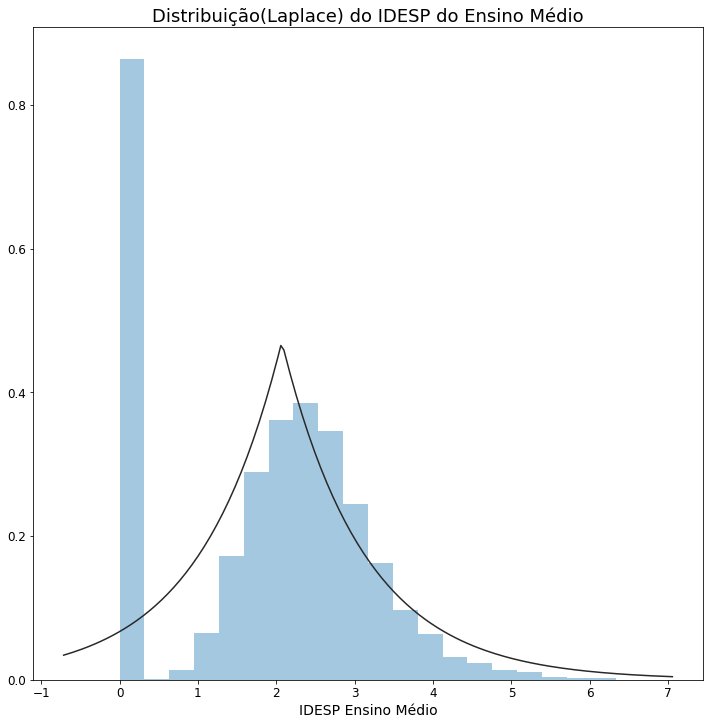

In [172]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_idesp_2019['ENSINO_MÉDIO'],
             fit = stats.laplace,
             kde = False)

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('IDESP Ensino Médio',
           fontsize = 14)

## Titulo
plt.title('Distribuição(Laplace) do IDESP do Ensino Médio', 
          fontsize = 18)

## Exibir
plt.show()

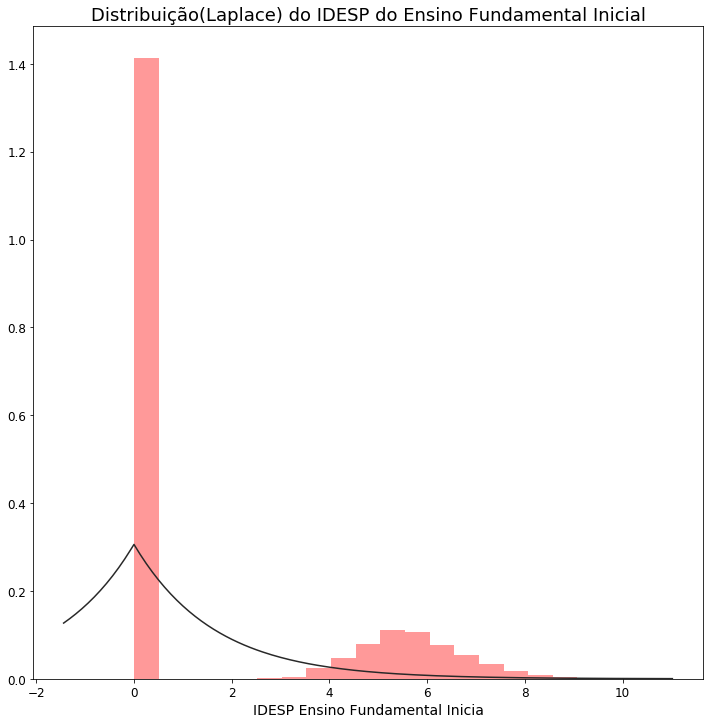

In [173]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_idesp_2019['ANOS_INICIAIS'],
             fit = stats.laplace,
             kde = False,
             color = 'red')

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('IDESP Ensino Fundamental Inicia',
           fontsize = 14)

## Titulo
plt.title('Distribuição(Laplace) do IDESP do Ensino Fundamental Inicial', 
          fontsize = 18)

## Exibir
plt.show()

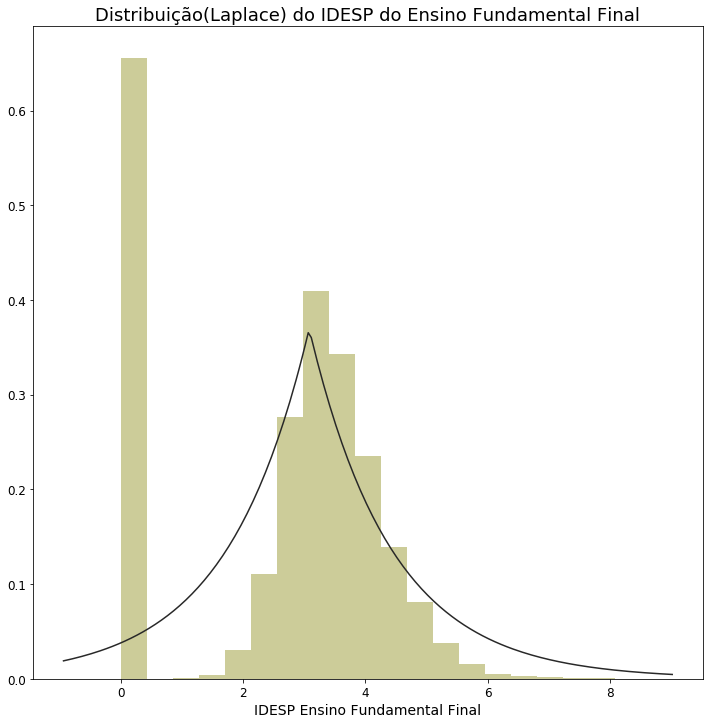

In [174]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_idesp_2019['ANOS_FINAIS'],
             fit = stats.laplace,
             kde = False,
            color = 'olive')

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('IDESP Ensino Fundamental Final',
           fontsize = 14)

## Titulo
plt.title('Distribuição(Laplace) do IDESP do Ensino Fundamental Final', 
          fontsize = 18)

## Exibir
plt.show()

<a id = 'head4_73'></a>
<h4>7.3. Distribuição no 'df_school_dependecy'</h4>

In [175]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'NOMEDEP')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
NOMEDEP                                                
ESTADUAL - SE                 5608                100.0

In [176]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'DE')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
DE                                                      
SUL 3                           113             2.014979
RIBEIRAO PRETO                  112             1.997147
MAUA                            108             1.925820
NORTE 1                         106             1.890157
CAMPINAS OESTE                  101             1.800999

In [177]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'MUN')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
MUN                                                  
SAO PAULO                   1158            20.649073
GUARULHOS                    176             3.138374
CAMPINAS                     169             3.013552
SANTO ANDRE                   90             1.604850
SOROCABA                      88             1.569187

In [178]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'DISTR')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
DISTR                                                    
GUARULHOS NORTE                   90             1.604850
SANTO ANDRE                       89             1.587019
SOROCABA                          88             1.569187
GUARULHOS SUL                     86             1.533524
CAMPINAS OESTE                    85             1.515692

In [179]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'TIPOESC_DESC')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
TIPOESC_DESC                                                                 
EE                                                  5052            90.085592
CEL                                                  188             3.352354
CLASSE PENITENCIÁRIA                                 150             2.674750
FEBEM - UI (CASA À PARTIR DE 2007)                   108             1.925820
FEBEM - UIP (CASA À PARTIR DE 2007)                   41             0.731098

In [180]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'SITUACAO')

## Mostrar os dados
df_freq_dist.head(5)

Frequencia Absoluta  Frequencia Relativa
SITUACAO                                          
Ativa                    5608                100.0

<a id = 'head3_8'></a>
<h3>8. Criando a ABT (Analytical Base Table)</h3>

<a id = 'head4_81'></a>
<h4>8.1. Realizando o join entre 'df_idesp_2019' e 'df_school_geolocation'</h4>

In [181]:
## Criação do dataframe onde esta sendo feito o join entre os dados geograficos da escola e a tabela
## com as informações de seu idesp
df_jn_idesp_geolocation = pd.merge(df_idesp_2019, df_school_geolocation,
                                   left_on = 'CODIGO_CIE',         
                                   right_on = 'COD_ESC',         
                                   how = 'inner')

## Deletar colunas com 'informações duplicadas'
df_jn_idesp_geolocation = df_jn_idesp_geolocation.drop(columns = ['CODIGO_CIE', 'NomeEscola', 'NomeMunicipio',
                                                                  'DE'])

## Renomear as colunas

# Dicionario com as colunas
dct_columns = {'ANO_LETIVO': 'ano_letivo', 'CODIGO_INEP' : 'cod_inep', 'CodigoDiretoria': 'cod_diretoria',
               'NomeDiretoria': 'nome_diretoria', 'ANOS_INICIAIS': 'idesp_anos_iniciais', 
               'ANOS_FINAIS': 'idesp_anos_finais', 'ENSINO_MÉDIO': 'idesp_ensino_medio', 
               'NOMEDEP': 'nome_rede_ensino', 'MUN': 'nome_municipio', 'DISTR': 'nome_distrito',
               'COD_ESC': 'cod_escola', 'NOMESC': 'nome_escola', 'SITUACAO': 'situacao_escola',
               'TIPOESC': 'tipo_escola', 'ENDESC': 'endereco_escola', 'NUMESC': 'numero_end_escola',
               'COMPLEND': 'complemento_endereco', 'CEP': 'cep_escola', 'BAIESC': 'bairro_escola',
               'ZONA': 'zona_escola', 'DS_LONGITUDE': 'longitude_escola', 'DS_LATITUDE': 'latitude_escola',
               'CODVINC': 'cod_escola_vinculadora', 'POSSUI_VINCULADORA': 'escola_possui_vinculadora'}

df_jn_idesp_geolocation = df_jn_idesp_geolocation.rename(columns = dct_columns)


In [182]:
## Verificando os primeiros 5 registros
df_jn_idesp_geolocation.head(5)

ano_letivo  cod_inep  cod_diretoria       nome_diretoria  \
0        2019  35349124          20407              JUNDIAI   
1        2019  35350308          20410           PIRACICABA   
2        2019  35350588          20507       RIBEIRAO PRETO   
3        2019  35350643          20507       RIBEIRAO PRETO   
4        2019  35351064          20205  SAO JOSE DOS CAMPOS   

   idesp_anos_iniciais  idesp_anos_finais  idesp_ensino_medio  \
0                  0.0               4.14                2.75   
1                  0.0               2.78                1.96   
2                  0.0               2.71                2.13   
3                  0.0               3.22                2.13   
4                  0.0               2.91                2.08   

  nome_rede_ensino       nome_municipio        nome_distrito  cod_escola  \
0    ESTADUAL - SE              JUNDIAI              JUNDIAI      349124   
1    ESTADUAL - SE           PIRACICABA           PIRACICABA      350308   
2    ESTADUAL - SE       RIBEIRAO PRETO       RIBEIRAO PRETO      350588   
3    ESTADUAL - SE              SERRANA              SERRANA      350643   
4    ESTADUAL - SE  SAO JOSE DOS CAMPOS  SAO JOSE DOS CAMPOS      351064   

                                nome_escola situacao_escola tipo_escola  \
0                     BAIRRO FAZENDA GRANDE           Ativa          EE   
1                             EDSON RONTANI           Ativa          EE   
2             JARDIM DIVA TARLA DE CARVALHO           Ativa          EE   
3             NEUSA MARIA DO BEM PROFESSORA           Ativa          EE   
4  SONIA MARIA ALEXANDRE PEREIRA PROFESSORA           Ativa          EE   

                  endereco_escola numero_end_escola complemento_endereco  \
0                 DANIEL DA SILVA               593                  RUA   
1        OLIVIA ANTONICELLA ZANIN                SN                  RUA   
2                   JOAO TONIOLLI              3475                  RUA   
3  RUA BENEDITO CARLOS DOS SANTOS                87                  RUA   
4               WALDEMAR TEIXEIRA              1000                  RUA   

   cep_escola                    bairro_escola zona_escola  longitude_escola  \
0    13212409                   FAZENDA GRANDE      URBANA        -46.966599   
1    13412276  RESIDENCIAL ALTOS DO PIRACICABA      URBANA        -47.664268   
2    14079390    JARDIM DIVA TARLA DE CARVALHO      URBANA        -47.741341   
3    14150000              JARDIM DAS ROSAS II      URBANA        -47.605370   
4    12229010            JARDIM TORRAO DE OURO      URBANA        -45.862598   

   latitude_escola  cod_escola_vinculadora  escola_possui_vinculadora  
0       -23.172199                     0.0                          0  
1       -22.685303                     0.0                          0  
2       -21.131149                     0.0                          0  
3       -21.208349                     0.0                          0  
4       -23.271299                     0.0                          0

<a id = 'head4_82'></a>
<h4>8.2. Realizando o join entre 'df_jn_idesp_geolocation' e 'df_school_dependecy_treat'</h4>

In [183]:
## Realizando o join entre as informações do idesp e as dependencias da escola
df_school_idesp_2019 = pd.merge(df_jn_idesp_geolocation, df_school_dependecy_treat,
                                   left_on = 'cod_escola',         
                                   right_on = 'CODESC',         
                                   how = 'inner')

## Deletar colunas com 'informações duplicadas'
df_school_idesp_2019 = df_school_idesp_2019.drop(columns = ['NOMEDEP', 'DE', 'MUN', 'DISTR', 'CODESC', 'NOMESC',
                                                            'TIPOESC', 'TIPOESC_DESC', 'SITUACAO'])

## Renomear colunas, colocando todas com lowercase

# Lista com as colunas
old_columns = [x for x in df_school_idesp_2019.columns]
new_columns = [str(x).lower() for x in df_school_idesp_2019.columns]

# Criando uma lista de tuplas com as colunas atuais e suas versoes minusculas
lst_tuple_columns = zip(old_columns, new_columns) 

# Criando um dicionario com o nome das colunas
dct_columns = defaultdict(list)
for key, value in lst_tuple_columns:
    dct_columns[key] = str(value)

# Renomeando as colunas do dataframe a partir do dicionario
df_school_idesp_2019 = df_school_idesp_2019.rename(columns = dct_columns)    

In [184]:
## Mostrar os cinco primeiros valores
df_school_idesp_2019.head(5)

ano_letivo  cod_inep  cod_diretoria       nome_diretoria  \
0        2019  35349124          20407              JUNDIAI   
1        2019  35350308          20410           PIRACICABA   
2        2019  35350588          20507       RIBEIRAO PRETO   
3        2019  35350643          20507       RIBEIRAO PRETO   
4        2019  35351064          20205  SAO JOSE DOS CAMPOS   

   idesp_anos_iniciais  idesp_anos_finais  idesp_ensino_medio  \
0                  0.0               4.14                2.75   
1                  0.0               2.78                1.96   
2                  0.0               2.71                2.13   
3                  0.0               3.22                2.13   
4                  0.0               2.91                2.08   

  nome_rede_ensino       nome_municipio        nome_distrito  cod_escola  \
0    ESTADUAL - SE              JUNDIAI              JUNDIAI      349124   
1    ESTADUAL - SE           PIRACICABA           PIRACICABA      350308   
2    ESTADUAL - SE       RIBEIRAO PRETO       RIBEIRAO PRETO      350588   
3    ESTADUAL - SE              SERRANA              SERRANA      350643   
4    ESTADUAL - SE  SAO JOSE DOS CAMPOS  SAO JOSE DOS CAMPOS      351064   

                                nome_escola situacao_escola tipo_escola  \
0                     BAIRRO FAZENDA GRANDE           Ativa          EE   
1                             EDSON RONTANI           Ativa          EE   
2             JARDIM DIVA TARLA DE CARVALHO           Ativa          EE   
3             NEUSA MARIA DO BEM PROFESSORA           Ativa          EE   
4  SONIA MARIA ALEXANDRE PEREIRA PROFESSORA           Ativa          EE   

                  endereco_escola numero_end_escola complemento_endereco  \
0                 DANIEL DA SILVA               593                  RUA   
1        OLIVIA ANTONICELLA ZANIN                SN                  RUA   
2                   JOAO TONIOLLI              3475                  RUA   
3  RUA BENEDITO CARLOS DOS SANTOS                87                  RUA   
4               WALDEMAR TEIXEIRA              1000                  RUA   

   cep_escola                    bairro_escola zona_escola  longitude_escola  \
0    13212409                   FAZENDA GRANDE      URBANA        -46.966599   
1    13412276  RESIDENCIAL ALTOS DO PIRACICABA      URBANA        -47.664268   
2    14079390    JARDIM DIVA TARLA DE CARVALHO      URBANA        -47.741341   
3    14150000              JARDIM DAS ROSAS II      URBANA        -47.605370   
4    12229010            JARDIM TORRAO DE OURO      URBANA        -45.862598   

   latitude_escola  cod_escola_vinculadora  escola_possui_vinculadora  \
0       -23.172199                     0.0                          0   
1       -22.685303                     0.0                          0   
2       -21.131149                     0.0                          0   
3       -21.208349                     0.0                          0   
4       -23.271299                     0.0                          0   

   tot_salas_aula  ...  sala_entretenimento  sala_estagio  sala_ginastica  \
0              15  ...                    0             0               0   
1              11  ...                    0             0               0   
2              10  ...                    0             0               0   
3              11  ...                    1             0               0   
4               8  ...                    0             0               0   

   sala_insumo_agricola  sala_insumo_veterinario  sala_marketing  \
0                     0                        0               0   
1                     0                        0               0   
2                     0                        0               0   
3                     0                        0               0   
4                     0                        0               0   

   sala_matricula  sala_musica  sala_pos_graduacao  sala_ordenha  \
0       

In [185]:
## Verificar se há algum valor nulo no dataframe
df_school_idesp_2019.isnull().values.any()

False

<a id = 'head3_9'></a>
<h3>9. Realizando o tratamento com as variaveis categoricas</h3>
<p>Temos alguns hiperparâmetros com valores categoricos, sendo assim precisaremos submeter tais dados aos processos de <i>Label Encoding</i> ou <i>One hot Encoding</i>.<br>Um ponto a se destacar, é que alguns dos hiperparâmetros categoricos, já possuem o seu equivalente numérico em outra coluna, então aplicaremos esse processo aos parâmetros: <b>'nome_rede_ensino', 'situacao_escola', 'tipo_escola' e 'zona_escola'</b></p>

<a id = 'head4_91'></a>
<h4>9.1. Analisando os dados dos parametros selecionados</h4>

In [186]:
## Verificar a distribuição dos dados
df_school_idesp_2019['nome_rede_ensino'].value_counts()

ESTADUAL - SE    5045
Name: nome_rede_ensino, dtype: int64

In [187]:
## Verificar a distribuição dos dados
df_school_idesp_2019['situacao_escola'].value_counts()

Ativa    5045
Name: situacao_escola, dtype: int64

In [188]:
## Verificar a distribuição dos dados
df_school_idesp_2019['tipo_escola'].value_counts()

EE                      5029
ÁREA DE ASSENTAMENTO      15
QUILOMBO                   1
Name: tipo_escola, dtype: int64

In [189]:
## Verificar a distribuição dos dados
df_school_idesp_2019['zona_escola'].value_counts()

URBANA    4886
RURAL      159
Name: zona_escola, dtype: int64

<p>De acordo com os valores distintos nas colunas, adotaremos o melhor processo de encoding. Para as colunas 'nome_rede_ensino' e 'situacao_escola' não aplicaremos nenhum tartamento, pois possui apenas um tipo de informação que não afetara em nada o modelo, já para as colunas 'tipo_escola' e 'zona_escola', utilizaremos o <b>One Hot Encondig</b></p>

In [190]:
## Dado as possiveis alterações, uma copia deverá ser feita
df_school_idesp_2019_treat = df_school_idesp_2019.copy(deep = True)

<a id = 'head4_92'></a>
<h4>9.2. Aplicando o One-Hot-Encondig</h4>

In [191]:
## Executando o processo de one hot encoding

# Criando o objeto onehotencoder
one_hot_encoding = OneHotEncoder()

# Criando um dataframe com as colunas
df_enc = pd.DataFrame(one_hot_encoding \
                          .fit_transform(df_school_idesp_2019_treat[['zona_escola']]) \
                          .toarray())

# Definindo o nome das colunas captando o nome das features
df_enc.columns = one_hot_encoding \
                        .get_feature_names(['zona_escola'])

# Remover do dataframe original a coluna que esta sendo usada no processo
df_school_idesp_2019_treat.drop(['zona_escola'], axis = 1, inplace = True)

# Realizar um concat
df_school_idesp_2019_treat = pd.concat([df_school_idesp_2019_treat, df_enc ], axis = 1)

## Renomeando as colunas novas
df_school_idesp_2019_treat = df_school_idesp_2019_treat \
                                .rename(columns = {'zona_escola_URBANA': 'zona_urbana',
                                                   'zona_escola_RURAL': 'zona_rural'})

In [192]:

# Criando um dataframe com as colunas
df_enc = pd.DataFrame(one_hot_encoding \
                          .fit_transform(df_school_idesp_2019_treat[['tipo_escola']]) \
                          .toarray())

# Definindo o nome das colunas captando o nome das features
df_enc.columns = one_hot_encoding \
                        .get_feature_names(['tipo_escola'])

# Remover do dataframe original a coluna que esta sendo usada no processo
df_school_idesp_2019_treat.drop(['tipo_escola'], axis = 1, inplace = True)

# Realizar um concat
df_school_idesp_2019_treat = pd.concat([df_school_idesp_2019_treat, df_enc ], axis = 1)

## Renomeando as colunas novas
df_school_idesp_2019_treat = df_school_idesp_2019_treat \
                                .rename(columns = {'tipo_escola_EE': 'tp_escola_estadual',
                                                   'tipo_escola_QUILOMBO': 'tp_escola_quilombo',
                                                   'tipo_escola_ÁREA DE ASSENTAMENTO': 'tp_escola_asssentamento'})

<a id = 'head3_10'></a>
<h3>10. Seleção de Hiperparâmetros</h3>
<p>Aqui faremos a seleção das variáveis númericas, dado que algumas delas já representam dados categóricos.</p>

In [193]:
## Setando apenas as variaveis numericas no dataframe final
df_school_idesp_2019_treat = df_school_idesp_2019_treat.select_dtypes(include = np.number)

In [194]:
## mostrando as primeiras 5 escolas
df_school_idesp_2019_treat.head(5)

ano_letivo  cod_inep  cod_diretoria  idesp_anos_iniciais  \
0        2019  35349124          20407                  0.0   
1        2019  35350308          20410                  0.0   
2        2019  35350588          20507                  0.0   
3        2019  35350643          20507                  0.0   
4        2019  35351064          20205                  0.0   

   idesp_anos_finais  idesp_ensino_medio  cod_escola  cep_escola  \
0               4.14                2.75      349124    13212409   
1               2.78                1.96      350308    13412276   
2               2.71                2.13      350588    14079390   
3               3.22                2.13      350643    14150000   
4               2.91                2.08      351064    12229010   

   longitude_escola  latitude_escola  cod_escola_vinculadora  \
0        -46.966599       -23.172199                     0.0   
1        -47.664268       -22.685303                     0.0   
2        -47.741341       -21.131149                     0.0   
3        -47.605370       -21.208349                     0.0   
4        -45.862598       -23.271299                     0.0   

   escola_possui_vinculadora  tot_salas_aula  auditorio  anfiteatro  teatro  \
0                          0              15          0           0       0   
1                          0              11          0           0       0   
2                          0              10          0           0       0   
3                          0              11          0           0       0   
4                          0               8          0           0       0   

   cantina  copa  cozinha  refeitorio  deposito_alimentos  despensa  \
0        1     0        1           1                   1         2   
1        0     0        1           1                   0         1   
2        1     1        1           1                   0         1   
3        1     0        1           1                   1         1   
4        0     1        1           1                   1         0   

   sala_leitura  biblioteca  quadra_coberta  ...  sala_marketing  \
0             1           0               1  ...               0   
1             1           0               1  ...               0   
2             1           0               1  ...               0   
3             1           0               1  ...               0   
4             1           0               1  ...               0   

   sala_matricula  sala_musica  sala_pos_graduacao  sala_ordenha  \
0               0            0                   0             0   
1               0            0                   0             0   
2               0            0                   0             0   
3               0            0                   0             0   
4               0            0                   0             0   

   sala_proc_prod_agropecuarios  sala_seguranca  sala_telefonia  \
0                             0               0               0   
1                             0               0               0   
2                             0               0               0   
3                             0               0               0   
4                             0               0               0   

   sala_financeiro  sala_pastoral  sala_reserv_agua  servidor  silo  varanda  \
0                0              0                 0         0     0        0   
1                0              0                 0         0     0        0   
2                0              0                 0         0     0        0   
3                0              0                 0         0     0        0   
4                0              0                 0         0     0        0   

   viveiro  sala_reorg_neuro  sala_terapia_ocup  sala_serigrafia  \
0        0                 0                  0                0   
1        0                 0                  0                0   
2        0            

<a id = 'head3_11'></a>
<h3>11. Criando as bases de treino e teste</h3>

<a id = 'head4_111'></a>
<h4>11.1. Definindo as variaveis</h4>

In [195]:
## Definindo as variaveis dependentes e independentes
X_independent_var = df_school_idesp_2019_treat \
                        .drop(columns = ['idesp_anos_iniciais', 'idesp_anos_finais', 'cod_escola_vinculadora',
                                         'idesp_ensino_medio', 'ano_letivo', 'cod_inep', 
                                         'cep_escola', 'cod_escola'])
## Variavel independente
y_dependent_var_high_school = df_school_idesp_2019_treat.loc[:, 'idesp_ensino_medio']

<a id = 'head4_112'></a>
<h4>11.2. Separando as bases de treino e teste</h4>

In [196]:
## Separando as bases de treino e teste, direcionando 30% dos dados para compor a base de teste
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, 
                                                    y_dependent_var_high_school, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

<a id = 'head3_12'></a>
<h3>12. Submetendo o problema aos modelos</h3>

In [197]:
def fn_linear_regression_summary(p_df_x, p_df_y):
    """
        Description:
            Valida algumas informações relacionadas ao dataframe

        Keyword arguments:
            p_df_x -- Um pandas dataframe referente as variaveis independentes/ preditoras
            p_df_y -- Um pandas dataframe referente a variavel dependente/ alvo

        Return:
            None

    """
    ## Adicionar uma coluna de uns a um array
    X2 = sm.add_constant(p_df_x)
    
    ## Objeto referente aos minimos quadrados ordinários para 
    ## estimar os parametros em um modelo de regraessão linear
    est = sm.OLS(p_df_y, X2)
    est2 = est.fit()
    
    ## Exibir um objeto com o sumario
    print(est2.summary())        
            

In [198]:
def fn_linear_regression_statistics(p_y_test, p_y_pred):
    """
        Description:
            Retorna o valor das principais métricas estatísticas do modelo

        Keyword arguments:
            p_y_test -- Base de teste utilizada no modelo (Series)
            p_y_pred -- Array com o valor predito a partir da base de teste

        Return:
            Retorna 4 variaveis que se referem respectivamente a MAE, MSE, R-Squared, RMSE

    """
    ## Variavel contendo o erro médio absoluto
    nu_mae = metrics.mean_absolute_error(p_y_test, p_y_pred)
    
    ## Variavel contendo o erro médio quadrático
    nu_mse = metrics.mean_squared_error(p_y_test, p_y_pred)
    
    ## Variavel contendo o r-quadrado
    nu_r2 = metrics.r2_score(p_y_test, p_y_pred)
    
    ## Variavel contendo a raiz do erro médio quadrático
    nu_rmse = np.sqrt(metrics.mean_squared_error(p_y_test, p_y_pred))
    
    ## Exibindo as métricas obtidas
    print('MAE - Erro Médio Absoluto: ', nu_mae,  
          '\nMSE - Erro Médio Quadrático: ', nu_mse, 
          '\nR2 - R-Quadrado: ', nu_r2,
          '\nRMSE - Raiz Quadrada do erro médio ao Quadrado:', nu_rmse)
    
    return nu_mae, nu_mse, nu_r2, nu_rmse
            

<a id = 'head4_121'></a>
<h4>12.1. Modelo de Regressão Linear</h4>

In [199]:
## Criando o objeto referente ao modelo
md_lin_reg = LinearRegression()  

## Submetendo a base de treino ao modelo
md_lin_reg.fit(X_train, y_train)

## Realizando a predição dos dados a partir da base de teste
y_pred = md_lin_reg.predict(X_test)

## Criando um dataframe com o valor real e o valor predito
df_lin_reg = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

<a id = 'head5_1211'></a>
<h5>12.1.1. Analisando as métricas</h5>

In [200]:
## Verificar as principais métricas estatisticas
fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9337583233487281 
MSE - Erro Médio Quadrático:  1.322370008191359 
R2 - R-Quadrado:  0.23563995522312176 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.1499434804334336


(0.9337583233487281,
 1.322370008191359,
 0.23563995522312176,
 1.1499434804334336)

In [201]:
## Verificar o p-valor e alguns dados do modelo
fn_linear_regression_summary(X_independent_var, y_dependent_var_high_school)

                            OLS Regression Results                            
Dep. Variable:     idesp_ensino_medio   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     16.66
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          1.16e-259
Time:                        10:39:57   Log-Likelihood:                -7712.7
No. Observations:                5045   AIC:                         1.565e+04
Df Residuals:                    4933   BIC:                         1.638e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/home/joao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<p>Como pudemos perceber, o R-quadrado que corresponde a % da variabilidade explicada pelo modelo, não esta boa, e além do mais existem muitos hiperparâmetros com um p-valor muito baixo, dessa forma teremos de remover os hiperparâmetros com p-valor que não represente o modelo.</p>

<a id = 'head5_1212'></a>
<h5>12.1.2. Definindo os hiperparâmetros</h5>
<p>Os hiperparâmetros que serão mantidos com base em seu p-valor, são: <b>cod_diretoria, cantina, sala_leitura, quadra_coberta, quadra_descoberta, gabinete_dentario, sala_gremio, lab_info, lab_fisica, lab_quimica, lab_biologia, playground, brinquedoteca, sala_reuniao, grafica, lab_junior, sala_marcenaria, zona_urbana</b></p>

In [202]:
lst_columns = ['cod_diretoria', 'cantina', 'sala_leitura', 'quadra_coberta', 'quadra_descoberta', 
               'gabinete_dentario', 'sala_gremio', 'lab_info', 'lab_fisica', 'lab_quimica', 'lab_biologia', 
               'playground', 'brinquedoteca', 'sala_reuniao', 'grafica', 'lab_junior', 'sala_marcenaria', 
               'zona_urbana']

In [203]:
## Definindo as variaveis dependentes e independentes
X_independent_var = df_school_idesp_2019_treat.loc[:, lst_columns]

In [204]:
## Separando as bases de treino e teste, direcionando 30% dos dados para compor a base de teste
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, 
                                                    y_dependent_var_high_school, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

## Criando o objeto referente ao modelo
md_lin_reg = LinearRegression()  

## Submetendo a base de treino ao modelo
md_lin_reg.fit(X_train, y_train)

## Realizando a predição dos dados a partir da base de teste
y_pred = md_lin_reg.predict(X_test)

## Criando um dataframe com o valor real e o valor predito
df_lin_reg = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

In [205]:
## Verificar as principais métricas estatisticas
mae_lin_reg, mse_lin_reg, r2_lin_reg, rmse_lin_reg = fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9343055001487844 
MSE - Erro Médio Quadrático:  1.3170909183478463 
R2 - R-Quadrado:  0.23869138963570913 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.1476458157235823


In [206]:
## Verificar o p-valor e alguns dados do modelo
fn_linear_regression_summary(X_independent_var, y_dependent_var_high_school)

                            OLS Regression Results                            
Dep. Variable:     idesp_ensino_medio   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          5.55e-298
Time:                        10:39:57   Log-Likelihood:                -7792.5
No. Observations:                5045   AIC:                         1.562e+04
Df Residuals:                    5028   BIC:                         1.573e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2100      0.12

<p>Percebemos uma leve melhora entre as bases de treino e teste com a adoção dos melhores hiperparâmetros, principalmente no R-quadrado ajustado. Todavia o modelo precisa de mais ajustes pois seu r-quadrado ainda não esta adequado, sendo preciso rever o modelo e os dados apresentados, afinal algumas colunas não fazem sentido para a predição dos dados em relação a negócio, como gabinete_dentario</p>

In [250]:
lst_columns = ['cod_diretoria', 'sala_leitura', 'sala_gremio', 'lab_info', 'lab_fisica', 'lab_quimica', 
               'lab_biologia', 'sala_reuniao', 'zona_urbana']

In [251]:
## Definindo as variaveis dependentes e independentes
X_independent_var = df_school_idesp_2019_treat.loc[:, lst_columns]

## Separando as bases de treino e teste, direcionando 30% dos dados para compor a base de teste
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, 
                                                    y_dependent_var_high_school, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

## Criando o objeto referente ao modelo
md_lin_reg = LinearRegression()  

## Submetendo a base de treino ao modelo
md_lin_reg.fit(X_train, y_train)

## Realizando a predição dos dados a partir da base de teste
y_pred = md_lin_reg.predict(X_test)

## Criando um dataframe com o valor real e o valor predito
df_lin_reg = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

In [252]:
## Verificar as principais métricas estatisticas
mae_lin_reg, mse_lin_reg, r2_lin_reg, rmse_lin_reg = fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9902308570455947 
MSE - Erro Médio Quadrático:  1.4326059643429354 
R2 - R-Quadrado:  0.17192105668633062 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.1969151867793038


In [253]:
## Verificar o p-valor e alguns dados do modelo
fn_linear_regression_summary(X_independent_var, y_dependent_var_high_school)

                            OLS Regression Results                            
Dep. Variable:     idesp_ensino_medio   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     122.7
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          2.26e-209
Time:                        11:29:19   Log-Likelihood:                -8015.6
No. Observations:                5045   AIC:                         1.605e+04
Df Residuals:                    5035   BIC:                         1.612e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3561      0.125      2.856

<a id = 'head4_122'></a>
<h4>12.2. Modelo Árvore de Decisão com Regressão</h4>
<p>Como a base de treino e teste ja foi definida bem como os hiperparâmetros, então apenas submeteremos os dados ao modelo.</p>

In [364]:
## Criando o objeto referente ao modelo
md_dec_tree = DecisionTreeRegressor(random_state = 42, 
                                    criterion = 'mse',
                                    max_depth = 7) #--7

## Submetendo a base de treino ao modelo
md_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [365]:
## Realizando a predição dos dados a partir da base de teste
y_pred = md_dec_tree.predict(X_test)

In [366]:
## Criando um dataframe com o valor real e o valor predito
df_dec_tree = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

<a id = 'head5_1221'></a>
<h5>12.2.1. Analisando as métricas</h5>

In [367]:
## Verificar as principais métricas estatisticas
mae_dec_tree, mse_dec_tree, r2_dec_tree, rmse_dec_tree = fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9563900700535387 
MSE - Erro Médio Quadrático:  1.453084879106083 
R2 - R-Quadrado:  0.16008377656928463 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.2054397036376738


<a id = 'head5_1222'></a>
<h5>12.2.2. Exibindo a Árvore</h5>

In [334]:
## Objeto com os dados da arvore
dot_data = tree.export_graphviz(md_dec_tree, 
                                feature_names = lst_columns,
                                filled = True, 
                                rounded = True, 
                                special_characters = True,
                                out_file = None)
## Gerando um arquivo referente a arvore
graph = graphviz.Source(dot_data)
graph.format = "jpeg"
graph.render("tree")

'tree.jpeg'

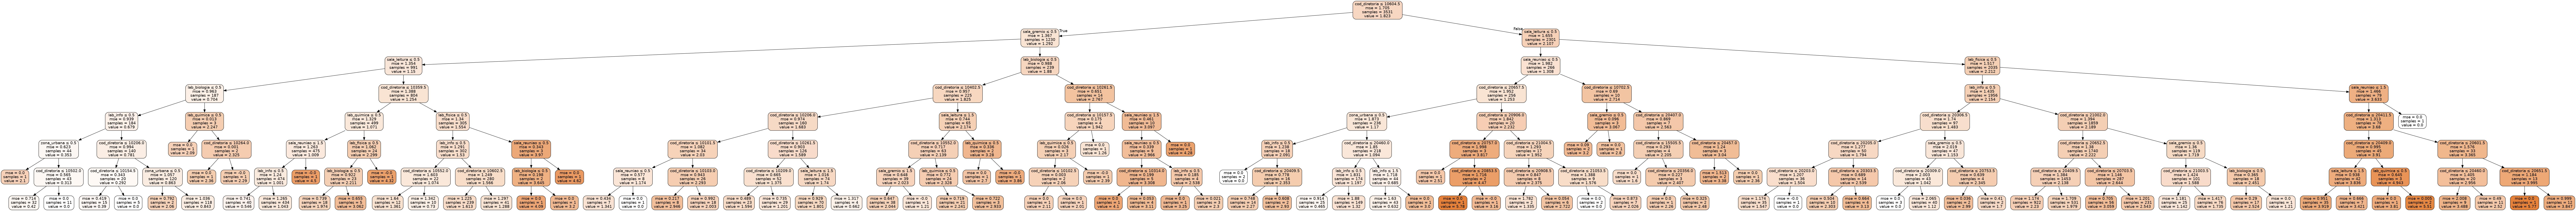

In [335]:
## Exibir a arvore
Image(filename='tree.jpeg') 

<a id = 'head3_13'></a>
<h3>13. Comparando as estatísticas dos modelos</h3>

In [368]:
dct_model_comparition = {'Regressão Linear ': 
                                               {'Erro medio absoluto(MAE)': mae_lin_reg ,
                                                'Erro médio quadrático(MSE)': mse_lin_reg ,
                                                'Raiz do erro medio quadratico(RMSE)': rmse_lin_reg,
                                                'R-quadrado': r2_lin_reg },
                        
                         'Árvore de Decisão com Regressão': 
                                               {'Erro medio absoluto(MAE)': mae_dec_tree  ,
                                                'Erro médio quadrático(MSE)': mse_dec_tree  ,
                                                'Raiz do erro medio quadratico(RMSE)': rmse_dec_tree ,
                                                'R-quadrado': r2_dec_tree  }
                        }

## Dataframe com os dados
df_model_comparission = pd.DataFrame(dct_model_comparition).T

## Mostrar Dados
df_model_comparission

Erro medio absoluto(MAE)  \
Regressão Linear                                 0.990231   
Árvore de Decisão com Regressão                  0.956390   

                                 Erro médio quadrático(MSE)  \
Regressão Linear                                   1.432606   
Árvore de Decisão com Regressão                    1.453085   

                                 Raiz do erro medio quadratico(RMSE)  \
Regressão Linear                                            1.196915   
Árvore de Decisão com Regressão                             1.205440   

                                 R-quadrado  
Regressão Linear                   0.171921  
Árvore de Decisão com Regressão    0.160084

In [215]:
df_idesp_2019

ANO_LETIVO  CODIGO_CIE  CODIGO_INEP  CodigoDiretoria  \
0           2019      349124     35349124            20407   
1           2019      350308     35350308            20410   
2           2019      350588     35350588            20507   
3           2019      350643     35350643            20507   
4           2019      351064     35351064            20205   
...          ...         ...          ...              ...   
5042        2019      297501     35297501            10314   
5043        2019      297513     35297513            10402   
5044        2019      297525     35297525            10402   
5045        2019      297537     35297537            10402   
5046        2019      297653     35297653            20410   

            NomeDiretoria                                NomeEscola  \
0                 JUNDIAI                     BAIRRO FAZENDA GRANDE   
1              PIRACICABA                             EDSON RONTANI   
2          RIBEIRAO PRETO             JARDIM DIVA TARLA DE CARVALHO   
3          RIBEIRAO PRETO             NEUSA MARIA DO BEM PROFESSORA   
4     SAO JOSE DOS CAMPOS  SONIA MARIA ALEXANDRE PEREIRA PROFESSORA   
...                   ...                                       ...   
5042                SUL 2                       REPUBLICA DO PANAMA   
5043        GUARULHOS SUL           RAFAEL RODRIGUES FILHO PREFEITO   
5044        GUARULHOS SUL                              PIMENTAS VII   
5045        GUARULHOS SUL                             LOUIS BRAILLE   
5046           PIRACICABA       DIONETTI CALLEGARO MIORI PROFESSORA   

            NomeMunicipio  ANOS_INICIAIS  ANOS_FINAIS  ENSINO_MÉDIO  
0                 JUNDIAI           0.00         4.14          2.75  
1              PIRACICABA           0.00         2.78          1.96  
2          RIBEIRAO PRETO           0.00         2.71          2.13  
3                 SERRANA           0.00         3.22          2.13  
4     SAO JOSE DOS CAMPOS           0.00         2.91          2.08  
...                   ...            ...          ...           ...  
5042            SAO PAULO           5.03         3.38          2.17  
5043            GUARULHOS           4.75         0.00          0.00  
5044            GUARULHOS           0.00         2.75          2.12  
5045            GUARULHOS           0.00         3.10          1.86  
5046           PIRACICABA           0.00         3.48          2.35  

[5047 rows x 10 columns]

In [222]:
df_school_dependecy_treat

Nome do Campo  \
0                         NOMEDEP   
1                              DE   
2                             MUN   
3                           DISTR   
4                          CODESC   
5                          NOMESC   
6                         TIPOESC   
7                    TIPOESC_DESC   
8                        SITUACAO   
9                      SALAS_AULA   
10                   SALAS_ED_INF   
11                   SALAS_ED_ESP   
12                   SALAS_ED_ART   
13                   SALA_RECURSO   
14                 TOT_SALAS_AULA   
15                      AUDITORIO   
16                     ANFITEATRO   
17                         TEATRO   
18                        CANTINA   
19                           COPA   
20                        COZINHA   
21                     REFEITORIO   
22             DEPOSITO_ALIMENTOS   
23                       DESPENSA   
24                   TOT_DESPENSA   
25                   SALA_LEITURA   
26                     BIBLIOTECA   
27               TOT_SALA_LEITURA   
28                 QUADRA_COBERTA   
29              QUADRA_DESCOBERTA   
30                        GINASIO   
31                     TOT_QUADRA   
32                   QUADRA_AREIA   
33                   QUADRA_GRAMA   
34                  CAMPO_FUTEBOL   
35              GABINETE_DENTARIO   
36             CONSULTORIO_MEDICO   
37                     ENFERMARIA   
38                    AMBULATORIO   
39                   ALMOXARIFADO   
40                        ARQUIVO   
41                    REPROGRAFIA   
42                    SALA_GREMIO   
43                      DIRETORIA   
44                  VICEDIRETORIA   
45                      SALA_PROF   
46                     SECRETARIA   
47                 SALA_ORIENT_ED   
48               SALA_COORD_PEDAG   
49                  PATIO_COBERTO   
50               PATIO_DESCOBERTO   
51                      ZELADORIA   
52                  VESTIARIO_FEM   
53                 VESTIARIO_MASC   
54                  TOT_VESTIARIO   
55                      VIDEOTECA   
56                        SALA_TV   
57                       LAB_INFO   
58                   LAB_CIENCIAS   
59                     LAB_FISICA   
60                    LAB_QUIMICA   
61                   LAB_BIOLOGIA   
62   LAB_CIENCIA_FISICA_BIOLOGICA   
63                TOT_LAB_CIENCIA   
64                    LAB_LINGUAS   
65                   LAB_MULTIUSO   
66                        OFICINA   
67                     PLAYGROUND   
68                     DORMITORIO   
69                       BERCARIO   
70             SANITARIO_ADEQ_PRE   
71         SANITARIO_ADEQ_PRE_FEM   
72        SANITARIO_ADEQ_PRE_MASC   
73             SANITARIO_ADEQ_DEF   
74        SANITARIO_ADEQ_DEF_MASC   
75              SANITARIO_AL_MASC   
76               SANITARIO_AL_FEM   
77               TOT_SANITARIO_AL   
78             SANITARIO_FUNC_FEM   
79            SANITARIO_FUNC_MASC   
80             TOT_SANITARIO_FUNC   
81                DEPEND_ADEQ_DEF   
82                 SALA_ED_FISICA   
83                        PISCINA   
84                       PORTARIA   
85          SALA_PROG_ESC_FAMILIA   
86                  BRINQUEDOTECA   
87                      FRALDARIO   
88                       LACTARIO   
89                     LAVANDERIA   
90                        SOLARIO   
91                    SALA_ESPERA   
92                  SALA_INSPETOR   
93                   SALA_REUNIAO   
94                     TESOURARIA   
95                   SALA_REFORCO   
96           SALA_DIRETOR_TECNICO   
97                 GARAGEM_ONIBUS   
98              SALA_FISIOTERAPIA   
99                SALA_PSICOLOGIA   
100           SALA_FONOAUDIOLOGIA   
101                  SALA_EVENTOS   
102            SALA_ASSIST_SOCIAL   
103             SALA_TERAPIA_EDUC   
104                    ABATEDOURO   
105                ALOJAMENTO_FEM   
106               ALOJAMENTO_MASC   
107                TOT_A

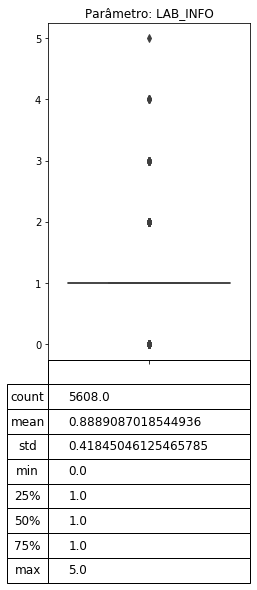

In [237]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy_treat, 'LAB_INFO')

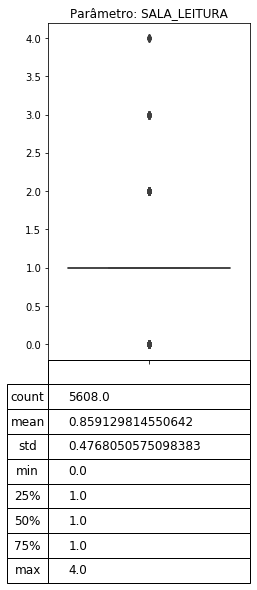

In [238]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy_treat, 'SALA_LEITURA')

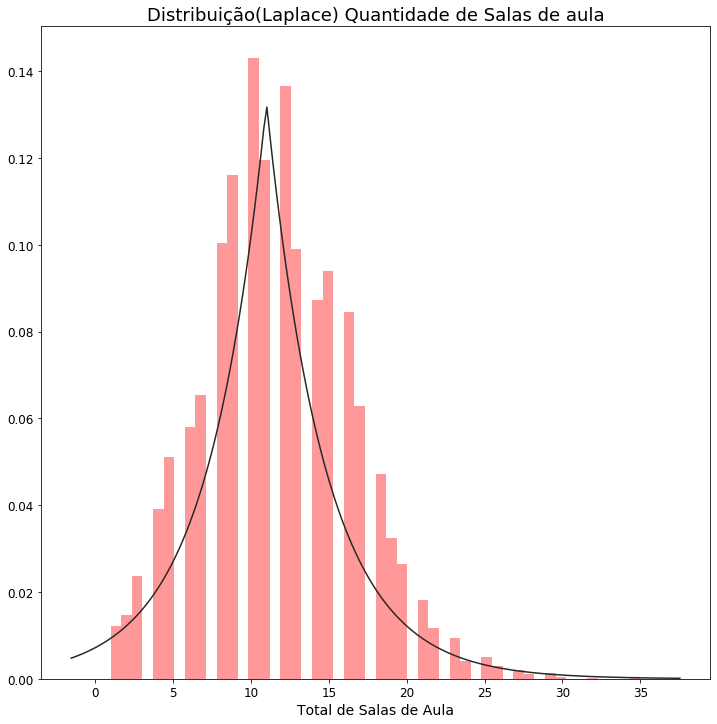

In [236]:
## Tamanho da figura
plt.figure(figsize=(12, 12))

## Objeto referente a distribuição dos dados
ax = sns.distplot(df_school_dependecy_treat['TOT_SALAS_AULA'],
             fit = stats.laplace,
             kde = False,
             color = 'red')

## Configuração das fontes dos ticks
ax.tick_params(axis = 'both',
               which = 'major',
               labelsize = 12)

## Texto eixo X
plt.xlabel('Total de Salas de Aula',
           fontsize = 14)

## Titulo
plt.title('Distribuição(Laplace) Quantidade de Salas de aula', 
          fontsize = 18)

## Exibir
plt.show()

In [244]:
X_test.count()

cod_diretoria        1514
cantina              1514
sala_leitura         1514
quadra_coberta       1514
quadra_descoberta    1514
gabinete_dentario    1514
sala_gremio          1514
lab_info             1514
lab_fisica           1514
lab_quimica          1514
lab_biologia         1514
playground           1514
brinquedoteca        1514
sala_reuniao         1514
grafica              1514
lab_junior           1514
sala_marcenaria      1514
zona_urbana          1514
dtype: int64

In [245]:
X_train.count()

cod_diretoria        3531
cantina              3531
sala_leitura         3531
quadra_coberta       3531
quadra_descoberta    3531
gabinete_dentario    3531
sala_gremio          3531
lab_info             3531
lab_fisica           3531
lab_quimica          3531
lab_biologia         3531
playground           3531
brinquedoteca        3531
sala_reuniao         3531
grafica              3531
lab_junior           3531
sala_marcenaria      3531
zona_urbana          3531
dtype: int64

<a id = 'head3_14'></a>
<h3>14. Conclusões</h3>

<p>Dentre os modelos de estatística tradicional o que apresentou melhor resultado foi o de <b>Regressão Linear</b>, pois 23% da variabilidade da variável alvo foi explicada pelo modelo, alem do que seu erro médio esta em eproximadamente 0.93, ou seja, o modelo erra cerca de 0.93 pontos ao predizer o indicador de qualidade do ensino médio.</p>

<p>Infelizmente os modelos não apresentaram métricas muito favoráveis e consistentes, por esse motivo que deveremos tomar algumas ações que podem impactar nas métricas dos modelos, essas ações são:</p>
<ol>
    <li>Verificar a base de dados das escolas, identificando se elas possuem ensino médio, pois algumas escolas estão com IDESP igual a ZERO, o que pode indicar que ou a escola não fez o exame, ou ela possui apenas o ensino fundamental;</li><br>
    <li>c</li><br>
    <li>Realizar uma clusterização das escolas, tanto para entender os perfis de escolas existentes, quanto para prover uma maior assertividade aos modelos</li><br>
</ol>